<a href="https://colab.research.google.com/github/sofiaRaheel/Brain-Tumor-Detection/blob/main/Brain_Tumor_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-mri-dataset


**LIBRARIES**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.ops import StochasticDepth
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm
import cv2
import copy
import random

CNN MODEL

Using device: cuda
BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, 

Training: 100%|██████████| 179/179 [00:39<00:00,  4.53it/s]


Train Loss: 0.9336 Acc: 0.6296


Validation: 100%|██████████| 41/41 [00:04<00:00,  8.33it/s]


Val Loss: 1.1314 Acc: 0.5278
Saved new best model
Epoch 2/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.7205 Acc: 0.7248


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.48it/s]


Val Loss: 0.9774 Acc: 0.6430
Saved new best model
Epoch 3/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.99it/s]


Train Loss: 0.6064 Acc: 0.7757


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.35it/s]


Val Loss: 0.9091 Acc: 0.6674
Saved new best model
Epoch 4/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.5418 Acc: 0.8027


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.37it/s]


Val Loss: 0.9045 Acc: 0.6735
Saved new best model
Epoch 5/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.4959 Acc: 0.8207


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.06it/s]


Val Loss: 0.8260 Acc: 0.6827
Saved new best model
Epoch 6/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.09it/s]


Train Loss: 0.4521 Acc: 0.8388


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.01it/s]


Val Loss: 0.8521 Acc: 0.6918
Saved new best model
Epoch 7/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.4090 Acc: 0.8529


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.62it/s]


Val Loss: 0.9681 Acc: 0.6804
Epoch 8/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.4020 Acc: 0.8550


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.47it/s]


Val Loss: 0.9282 Acc: 0.6895
Epoch 9/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.10it/s]


Train Loss: 0.3886 Acc: 0.8659


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.42it/s]


Val Loss: 0.7360 Acc: 0.7414
Saved new best model
Epoch 10/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.3549 Acc: 0.8762


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.48it/s]


Val Loss: 0.8565 Acc: 0.7216
Epoch 11/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.3569 Acc: 0.8732


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.46it/s]


Val Loss: 0.8232 Acc: 0.7330
Epoch 12/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.08it/s]


Train Loss: 0.3421 Acc: 0.8771


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.55it/s]


Val Loss: 0.8810 Acc: 0.7231
Epoch 13/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.3350 Acc: 0.8775


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.05it/s]


Val Loss: 0.8626 Acc: 0.7338
Epoch 14/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.3297 Acc: 0.8827


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.8262 Acc: 0.7307
Early stopping triggered after 5 epochs without improvement


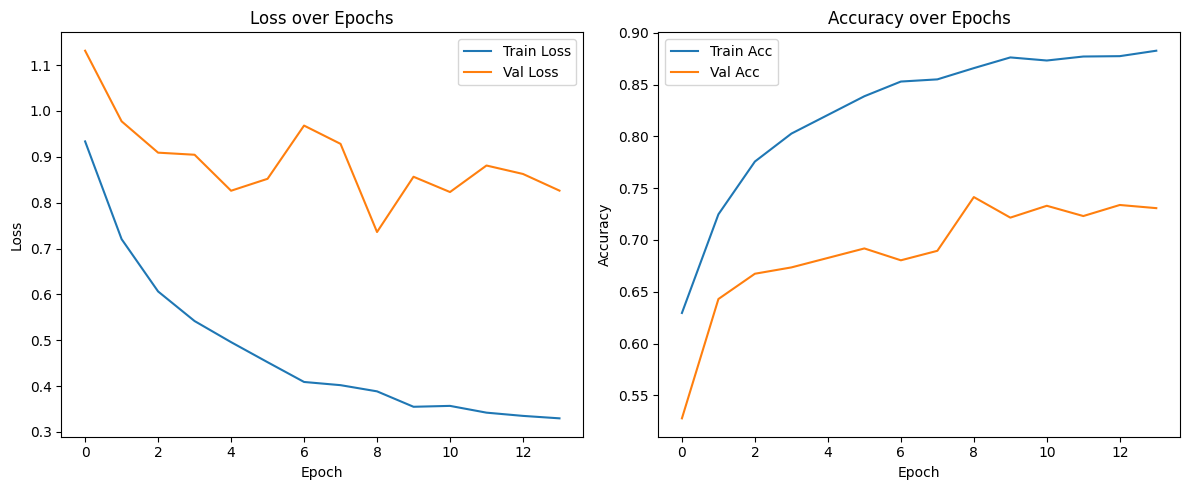


Evaluating best model...

Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.66      0.76       300
  meningioma       0.66      0.45      0.54       306
     notumor       0.91      0.83      0.87       405
   pituitary       0.59      1.00      0.74       300

    accuracy                           0.74      1311
   macro avg       0.76      0.74      0.73      1311
weighted avg       0.77      0.74      0.74      1311



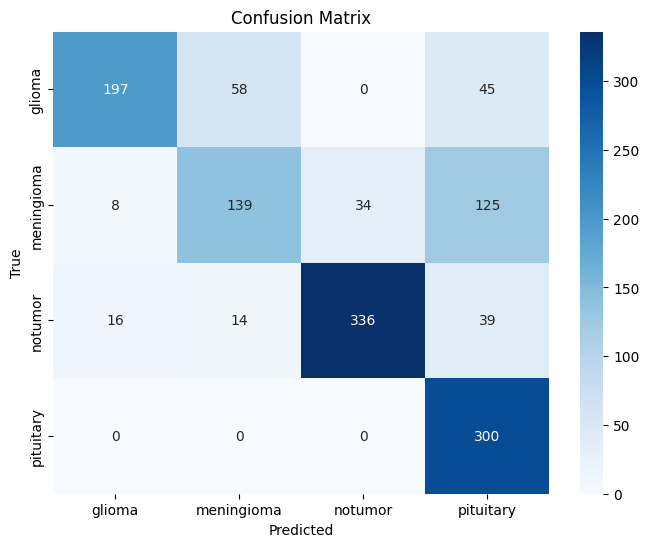

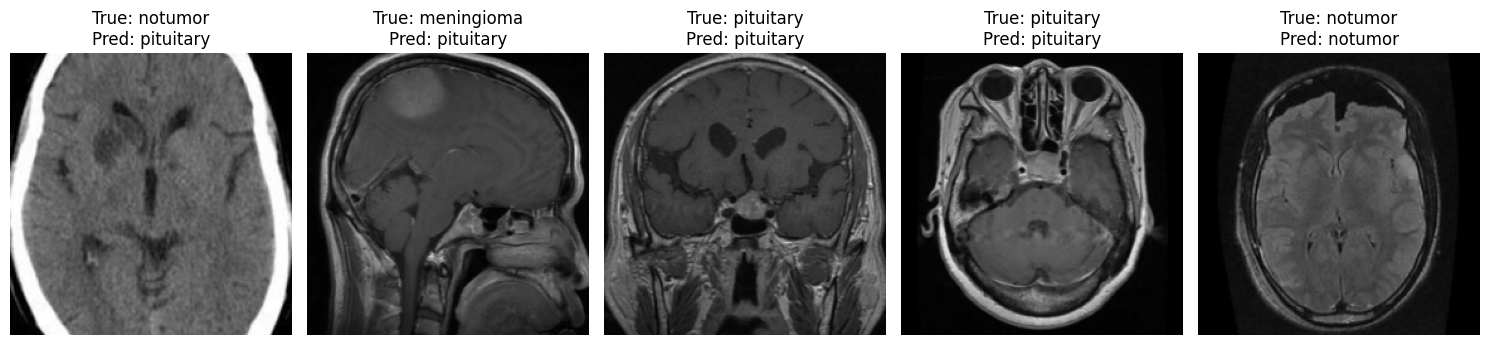


Sample training images:


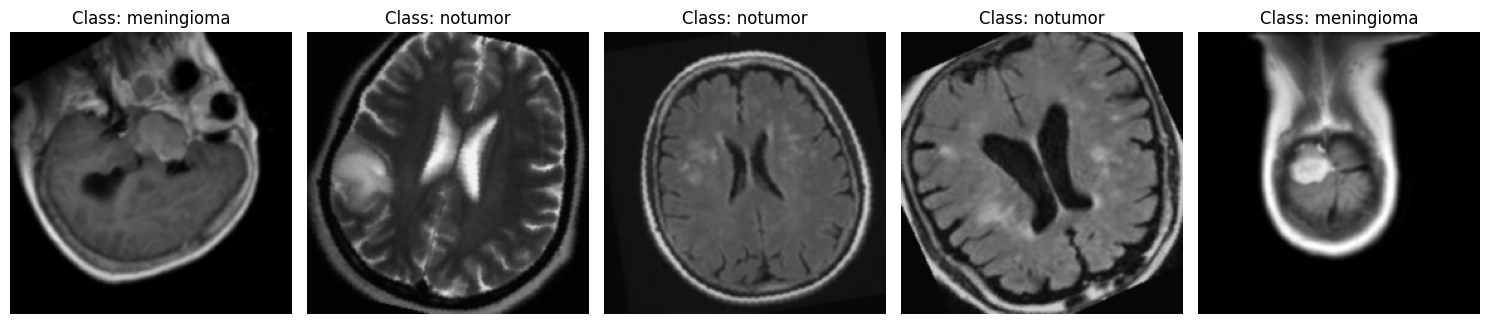


Sample test images:


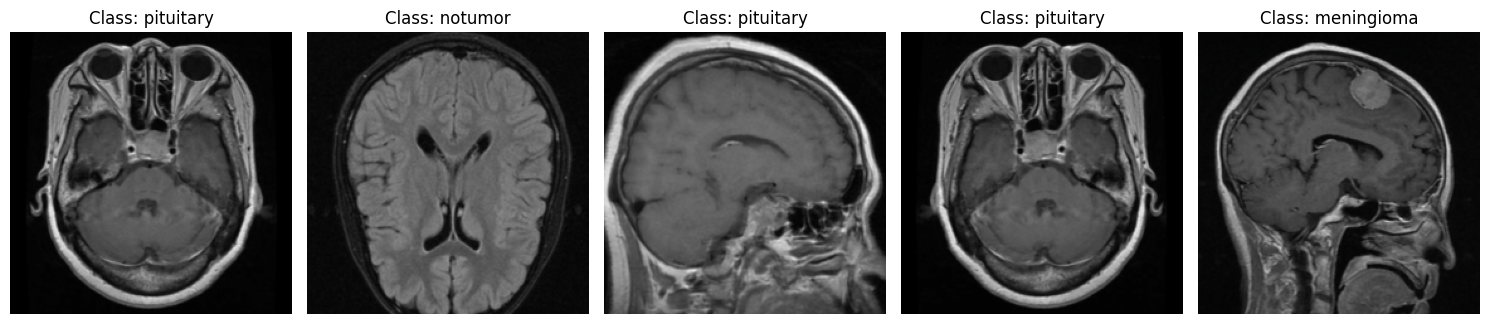

In [ ]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Dataset Class (same as your ResNet example)
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='Training'):
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.classes = sorted(os.listdir(self.root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()
        self.class_counts = self._get_class_counts()

    def _load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, img_name)
                    images.append((img_path, self.class_to_idx[class_name]))
        return images

    def _get_class_counts(self):
        counts = [0] * len(self.classes)
        for _, label in self.images:
            counts[label] += 1
        return counts

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

# Data Augmentation (same as your ResNet example)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.GaussianBlur(kernel_size=(3,3)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets and dataloaders
path = '/kaggle/input/brain-tumor-mri-dataset'  # Replace with your actual path
train_dataset = BrainTumorDataset(path, transform=data_transforms['train'], split='Training')
test_dataset = BrainTumorDataset(path, transform=data_transforms['test'], split='Testing')

# Calculate class weights for imbalanced data
class_weights = 1. / torch.tensor(train_dataset.class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# CNN-from-scratch model
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()

        # Feature extraction
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize model
model = BrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
print(model)

# Training setup
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

# Training function with evaluation and visualization
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    patience = 5
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        scheduler.step()

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = (running_corrects.double() / len(train_dataset)).cpu().numpy()
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Validation"):
                inputs = inputs.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = (running_corrects.double() / len(test_dataset)).cpu().numpy()
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc)

        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Early stopping logic
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            epochs_without_improvement = 0
            torch.save(model.state_dict(), 'best_cnn_model.pth')
            print("Saved new best model")
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping triggered after {patience} epochs without improvement")
                break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_metrics.png')
    plt.show()

    return model

# Evaluation functions
def evaluate_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png')
    plt.show()

def show_predictions(model, test_dataset, num_samples=5):
    model.eval()
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        image, label = test_dataset[idx]
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            _, pred = torch.max(output, 1)

        image = image.squeeze().cpu().numpy()
        image = np.transpose(image, (1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'True: {test_dataset.classes[label]}\nPred: {test_dataset.classes[pred.item()]}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Train the model
print("Starting training...")
trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler)

# Load best model and evaluate
print("\nEvaluating best model...")
model.load_state_dict(torch.load('best_cnn_model.pth'))
evaluate_model(model, test_loader, train_dataset.classes)
show_predictions(model, test_dataset)

# Show sample images from dataset
def show_dataset_samples(dataset, num_samples=5):
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        image, label = dataset[idx]

        image = image.numpy()
        image = np.transpose(image, (1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'Class: {dataset.classes[label]}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('dataset_samples.png')
    plt.show()

print("\nSample training images:")
show_dataset_samples(train_dataset)
print("\nSample test images:")
show_dataset_samples(test_dataset)

R2 - no early stopping

Using device: cuda
BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, 

Training: 100%|██████████| 179/179 [00:35<00:00,  5.07it/s]


Train Loss: 0.9391 Acc: 0.6280


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.49it/s]


Val Loss: 0.9680 Acc: 0.5835
Saved new best model
Epoch 2/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.20it/s]


Train Loss: 0.7275 Acc: 0.7211


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.44it/s]


Val Loss: 0.9875 Acc: 0.5950
Saved new best model
Epoch 3/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.6272 Acc: 0.7612


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.46it/s]


Val Loss: 0.8879 Acc: 0.6430
Saved new best model
Epoch 4/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.10it/s]


Train Loss: 0.5496 Acc: 0.7959


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.86it/s]


Val Loss: 0.8670 Acc: 0.6644
Saved new best model
Epoch 5/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.5150 Acc: 0.8148


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.58it/s]


Val Loss: 0.7989 Acc: 0.6979
Saved new best model
Epoch 6/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.4563 Acc: 0.8391


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.43it/s]


Val Loss: 0.8926 Acc: 0.6957
Epoch 7/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.4255 Acc: 0.8505


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.17it/s]


Val Loss: 0.9045 Acc: 0.6812
Epoch 8/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.4024 Acc: 0.8552


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.30it/s]


Val Loss: 0.8766 Acc: 0.7132
Saved new best model
Epoch 9/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.3696 Acc: 0.8671


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.96it/s]


Val Loss: 0.7991 Acc: 0.7269
Saved new best model
Epoch 10/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.3525 Acc: 0.8775


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.43it/s]


Val Loss: 0.6474 Acc: 0.7796
Saved new best model
Epoch 11/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.3429 Acc: 0.8762


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.34it/s]


Val Loss: 0.6449 Acc: 0.7857
Saved new best model
Epoch 12/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.3280 Acc: 0.8862


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.30it/s]


Val Loss: 0.6791 Acc: 0.7872
Saved new best model
Epoch 13/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.3131 Acc: 0.8923


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.54it/s]


Val Loss: 0.7065 Acc: 0.7788
Epoch 14/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.3015 Acc: 0.8943


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.12it/s]


Val Loss: 0.6940 Acc: 0.7780
Epoch 15/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.12it/s]


Train Loss: 0.3075 Acc: 0.8897


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.51it/s]


Val Loss: 0.7094 Acc: 0.7765
Epoch 16/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.3142 Acc: 0.8901


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.46it/s]


Val Loss: 0.6612 Acc: 0.7887
Saved new best model
Epoch 17/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.3092 Acc: 0.8895


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.54it/s]


Val Loss: 0.7220 Acc: 0.7712
Epoch 18/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.3128 Acc: 0.8920


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.39it/s]


Val Loss: 0.6806 Acc: 0.7872
Epoch 19/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2997 Acc: 0.8936


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.57it/s]


Val Loss: 0.6904 Acc: 0.7773
Epoch 20/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.12it/s]


Train Loss: 0.3021 Acc: 0.8965


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.03it/s]


Val Loss: 0.7024 Acc: 0.7849
Epoch 21/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.3068 Acc: 0.8937


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.47it/s]


Val Loss: 0.6812 Acc: 0.7941
Saved new best model
Epoch 22/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.17it/s]


Train Loss: 0.2990 Acc: 0.8932


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.51it/s]


Val Loss: 0.6096 Acc: 0.8108
Saved new best model
Epoch 23/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2971 Acc: 0.8923


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.62it/s]


Val Loss: 0.6812 Acc: 0.7796
Epoch 24/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2925 Acc: 0.8985


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.43it/s]


Val Loss: 0.5609 Acc: 0.8284
Saved new best model
Epoch 25/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2932 Acc: 0.8960


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.05it/s]


Val Loss: 0.5766 Acc: 0.7971
Epoch 26/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.2857 Acc: 0.9009


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.51it/s]


Val Loss: 0.5821 Acc: 0.8223
Epoch 27/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.2772 Acc: 0.8997


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.59it/s]


Val Loss: 0.5486 Acc: 0.8314
Saved new best model
Epoch 28/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.17it/s]


Train Loss: 0.2722 Acc: 0.9044


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.36it/s]


Val Loss: 0.5768 Acc: 0.8063
Epoch 29/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.17it/s]


Train Loss: 0.2612 Acc: 0.9083


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.99it/s]


Val Loss: 0.4008 Acc: 0.8642
Saved new best model
Epoch 30/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.2488 Acc: 0.9133


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.40it/s]


Val Loss: 0.3276 Acc: 0.8871
Saved new best model
Epoch 31/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.2488 Acc: 0.9118


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.97it/s]


Val Loss: 0.3789 Acc: 0.8719
Epoch 32/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2293 Acc: 0.9165


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.65it/s]


Val Loss: 0.3851 Acc: 0.8696
Epoch 33/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2177 Acc: 0.9226


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.57it/s]


Val Loss: 0.4001 Acc: 0.8642
Epoch 34/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2227 Acc: 0.9189


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.65it/s]


Val Loss: 0.4322 Acc: 0.8551
Epoch 35/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.2180 Acc: 0.9244


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.27it/s]


Val Loss: 0.4265 Acc: 0.8574
Epoch 36/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.2030 Acc: 0.9282


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.94it/s]


Val Loss: 0.3961 Acc: 0.8680
Epoch 37/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.13it/s]


Train Loss: 0.1944 Acc: 0.9352


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.57it/s]


Val Loss: 0.2773 Acc: 0.9077
Saved new best model
Epoch 38/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.1984 Acc: 0.9296


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.50it/s]


Val Loss: 0.3054 Acc: 0.8970
Epoch 39/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.1774 Acc: 0.9440


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.54it/s]


Val Loss: 0.3222 Acc: 0.8947
Epoch 40/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.1719 Acc: 0.9396


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.31it/s]


Val Loss: 0.3297 Acc: 0.8902
Epoch 41/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.1658 Acc: 0.9394


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.38it/s]


Val Loss: 0.2912 Acc: 0.8963
Epoch 42/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.12it/s]


Train Loss: 0.1592 Acc: 0.9463


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.93it/s]


Val Loss: 0.2806 Acc: 0.9069
Epoch 43/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.1678 Acc: 0.9407


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.23it/s]


Val Loss: 0.3060 Acc: 0.9047
Epoch 44/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.16it/s]


Train Loss: 0.1559 Acc: 0.9466


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.35it/s]


Val Loss: 0.2992 Acc: 0.9039
Epoch 45/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.1489 Acc: 0.9499


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.47it/s]


Val Loss: 0.2785 Acc: 0.9092
Saved new best model
Epoch 46/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.1630 Acc: 0.9433


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.35it/s]


Val Loss: 0.2928 Acc: 0.9039
Epoch 47/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.17it/s]


Train Loss: 0.1627 Acc: 0.9456


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.40it/s]


Val Loss: 0.2911 Acc: 0.9069
Epoch 48/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.1591 Acc: 0.9464


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.54it/s]


Val Loss: 0.3082 Acc: 0.9016
Epoch 49/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.17it/s]


Train Loss: 0.1561 Acc: 0.9464


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.46it/s]


Val Loss: 0.2858 Acc: 0.9100
Saved new best model
Epoch 50/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.15it/s]


Train Loss: 0.1547 Acc: 0.9492


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.52it/s]


Val Loss: 0.2863 Acc: 0.9016


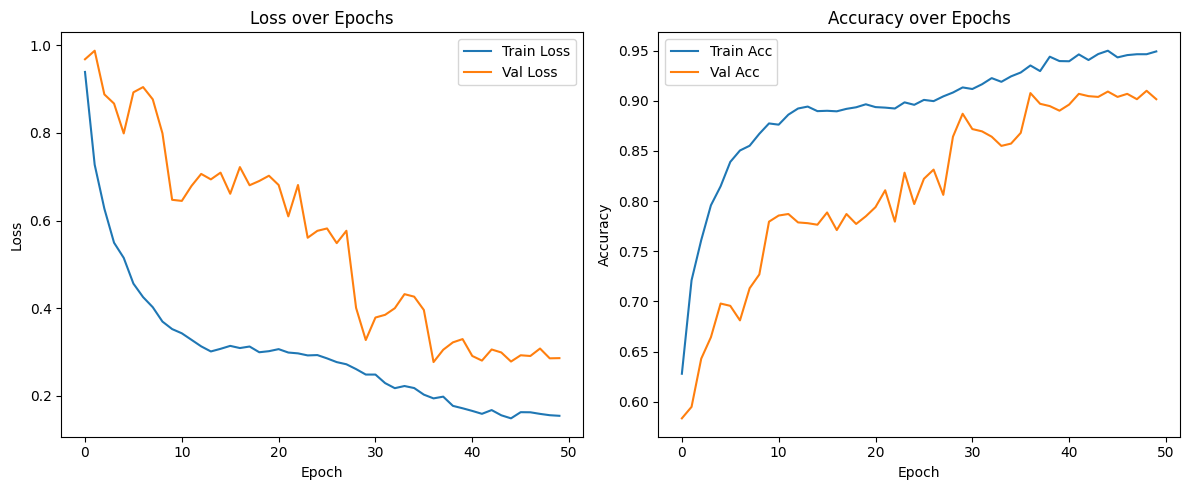


Evaluating best model...

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.89      0.93       300
  meningioma       0.93      0.75      0.83       306
     notumor       0.94      0.97      0.96       405
   pituitary       0.82      1.00      0.90       300

    accuracy                           0.91      1311
   macro avg       0.91      0.91      0.90      1311
weighted avg       0.92      0.91      0.91      1311



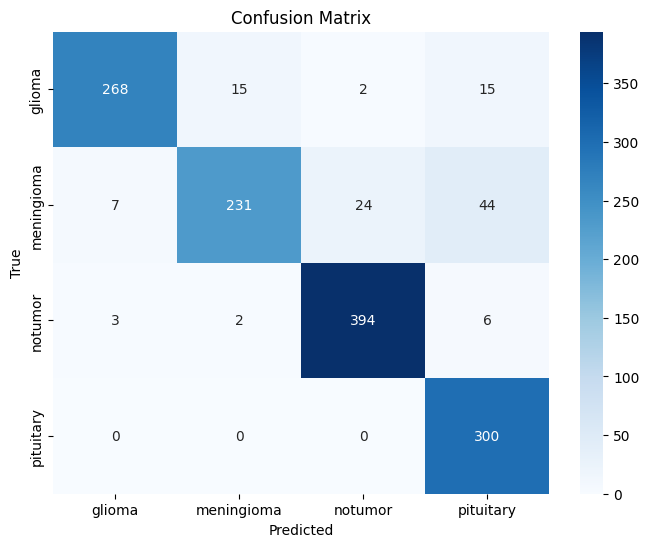

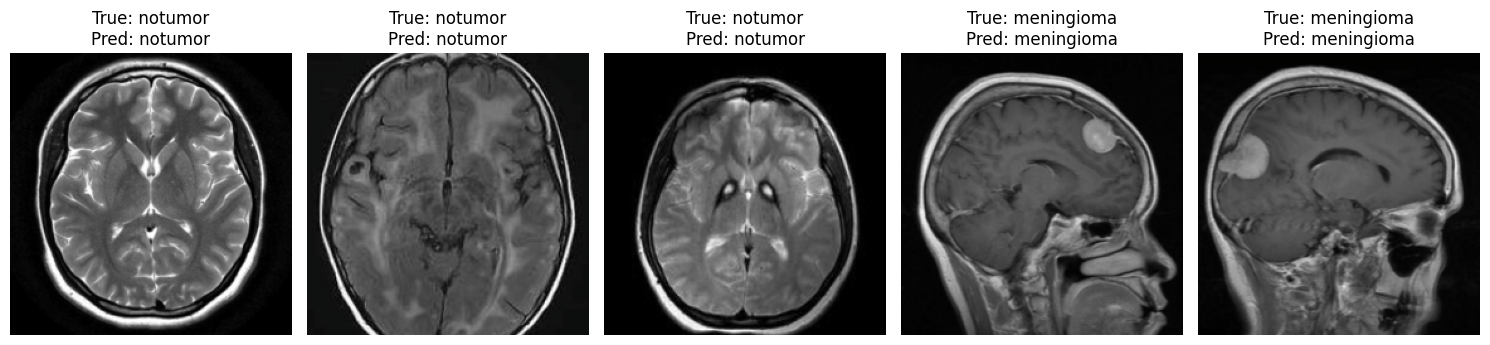


Sample training images:


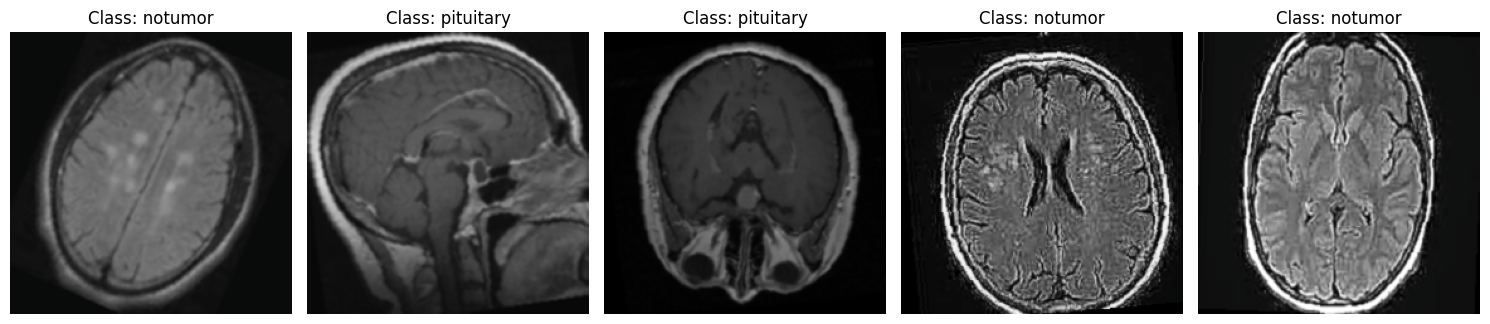


Sample test images:


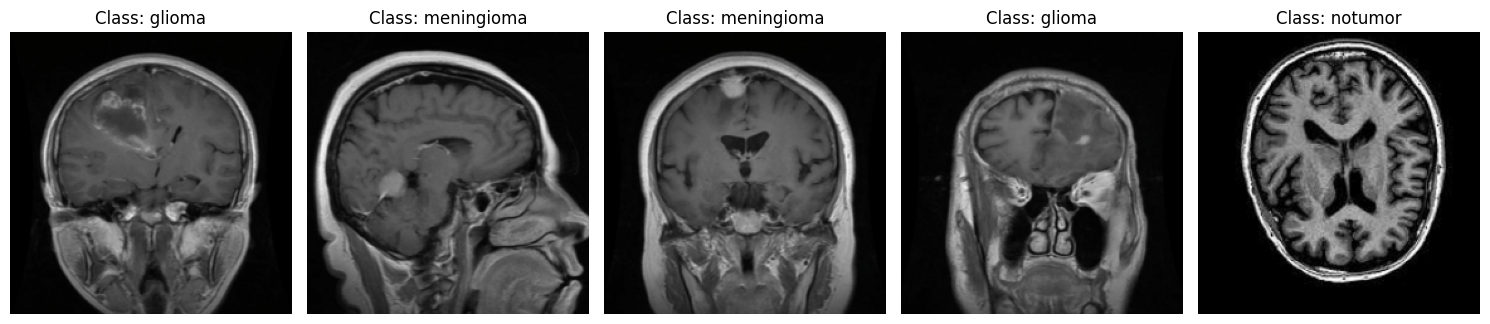

In [ ]:

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Dataset Class
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='Training'):
        self.root_dir = os.path.join(root_dir, split)
        self.transform = transform
        self.classes = sorted(os.listdir(self.root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()
        self.class_counts = self._get_class_counts()

    def _load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, img_name)
                    images.append((img_path, self.class_to_idx[class_name]))
        return images

    def _get_class_counts(self):
        counts = [0] * len(self.classes)
        for _, label in self.images:
            counts[label] += 1
        return counts

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

# Data Augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.GaussianBlur(kernel_size=(3,3)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets and dataloaders
path = '/kaggle/input/brain-tumor-mri-dataset'  # Replace with your actual path
train_dataset = BrainTumorDataset(path, transform=data_transforms['train'], split='Training')
test_dataset = BrainTumorDataset(path, transform=data_transforms['test'], split='Testing')

# Calculate class weights for imbalanced data
class_weights = 1. / torch.tensor(train_dataset.class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# CNN-from-scratch model
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()

        # Feature extraction
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize model
model = BrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
print(model)

# Training setup
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

# Training function with evaluation and visualization
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Early stopping parameters (commented out but kept for reference)
    # patience = 5
    # epochs_without_improvement = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        scheduler.step()

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = (running_corrects.double() / len(train_dataset)).cpu().numpy()
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Validation"):
                inputs = inputs.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = (running_corrects.double() / len(test_dataset)).cpu().numpy()
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc)

        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Model saving logic (without early stopping)
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_cnn_model.pth')
            print("Saved new best model")

        # Early stopping logic (commented out but kept for reference)
        # if epoch_acc > best_acc:
        #     best_acc = epoch_acc
        #     epochs_without_improvement = 0
        #     torch.save(model.state_dict(), 'best_cnn_model.pth')
        #     print("Saved new best model")
        # else:
        #     epochs_without_improvement += 1
        #     if epochs_without_improvement >= patience:
        #         print(f"Early stopping triggered after {patience} epochs without improvement")
        #         break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_metrics.png')
    plt.show()

    return model

# Evaluation functions
def evaluate_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png')
    plt.show()

def show_predictions(model, test_dataset, num_samples=5):
    model.eval()
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        image, label = test_dataset[idx]
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            _, pred = torch.max(output, 1)

        image = image.squeeze().cpu().numpy()
        image = np.transpose(image, (1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'True: {test_dataset.classes[label]}\nPred: {test_dataset.classes[pred.item()]}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Train the model
print("Starting training...")
trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler)

# Load best model and evaluate
print("\nEvaluating best model...")
model.load_state_dict(torch.load('best_cnn_model.pth'))
evaluate_model(model, test_loader, train_dataset.classes)
show_predictions(model, test_dataset)

# Show sample images from dataset
def show_dataset_samples(dataset, num_samples=5):
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        image, label = dataset[idx]

        image = image.numpy()
        image = np.transpose(image, (1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'Class: {dataset.classes[label]}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('dataset_samples.png')
    plt.show()

print("\nSample training images:")
show_dataset_samples(train_dataset)
print("\nSample test images:")
show_dataset_samples(test_dataset)

IMPROVED CNN

Starting training with improved CNN...
Epoch 1/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.94it/s]


Train Loss: 1.1615 Acc: 0.5476
Val Loss: 1.2427 Acc: 0.4851
Saved new best model
Epoch 2/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.73it/s]


Train Loss: 1.0006 Acc: 0.6425
Val Loss: 1.5056 Acc: 0.4577
Epoch 3/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.71it/s]


Train Loss: 0.8999 Acc: 0.7087
Val Loss: 1.3559 Acc: 0.5629
Saved new best model
Epoch 4/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.62it/s]


Train Loss: 0.8491 Acc: 0.7332
Val Loss: 1.0932 Acc: 0.6545
Saved new best model
Epoch 5/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.69it/s]


Train Loss: 0.8189 Acc: 0.7509
Val Loss: 1.2506 Acc: 0.6522
Epoch 6/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.80it/s]


Train Loss: 0.7716 Acc: 0.7827
Val Loss: 0.7783 Acc: 0.7925
Saved new best model
Epoch 7/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Train Loss: 0.7476 Acc: 0.8029
Val Loss: 1.2033 Acc: 0.6484
Epoch 8/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.85it/s]


Train Loss: 0.7212 Acc: 0.8153
Val Loss: 0.8144 Acc: 0.7956
Saved new best model
Epoch 9/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.78it/s]


Train Loss: 0.7024 Acc: 0.8270
Val Loss: 0.6827 Acc: 0.8398
Saved new best model
Epoch 10/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.74it/s]


Train Loss: 0.6668 Acc: 0.8498
Val Loss: 0.6860 Acc: 0.8253
Epoch 11/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.63it/s]


Train Loss: 0.6490 Acc: 0.8571
Val Loss: 0.5697 Acc: 0.9092
Saved new best model
Epoch 12/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.44it/s]


Train Loss: 0.6272 Acc: 0.8675
Val Loss: 0.7341 Acc: 0.8162
Epoch 13/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.55it/s]


Train Loss: 0.6189 Acc: 0.8717
Val Loss: 0.7675 Acc: 0.7895
Epoch 14/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.26it/s]


Train Loss: 0.5985 Acc: 0.8818
Val Loss: 0.7218 Acc: 0.8207
Epoch 15/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.68it/s]


Train Loss: 0.5800 Acc: 0.8944
Val Loss: 0.7401 Acc: 0.8223
Epoch 16/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.52it/s]


Train Loss: 0.5671 Acc: 0.8976
Val Loss: 0.5600 Acc: 0.9031
Epoch 17/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.46it/s]


Train Loss: 0.5634 Acc: 0.9046
Val Loss: 0.6092 Acc: 0.8612
Epoch 18/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.79it/s]


Train Loss: 0.5357 Acc: 0.9165
Val Loss: 0.6528 Acc: 0.8520
Early stopping after 7 epochs without improvement


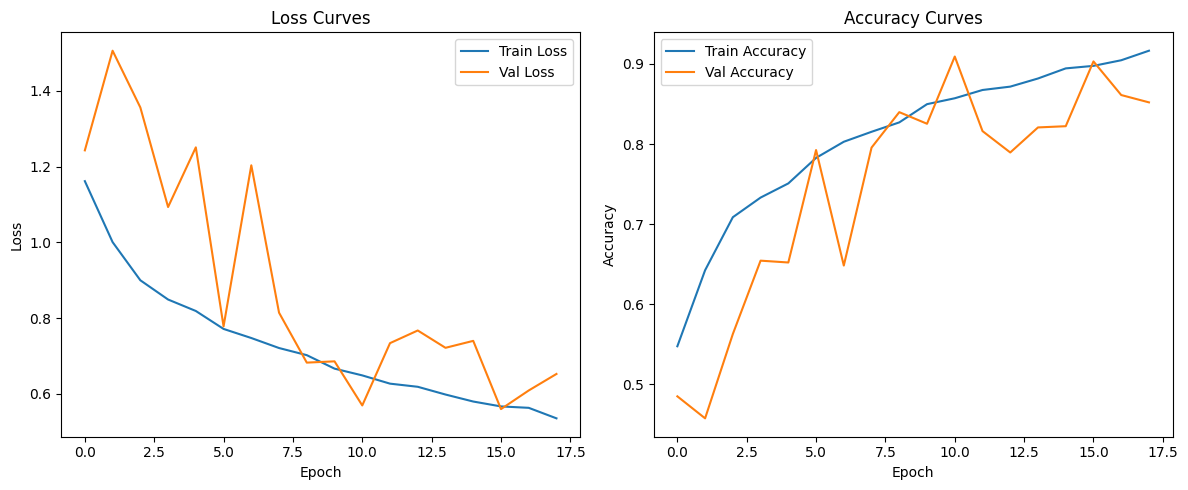


Classification Report:
              precision    recall  f1-score   support

      glioma       0.93      0.91      0.92       300
  meningioma       0.93      0.75      0.83       306
     notumor       0.92      0.98      0.95       405
   pituitary       0.87      0.98      0.92       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



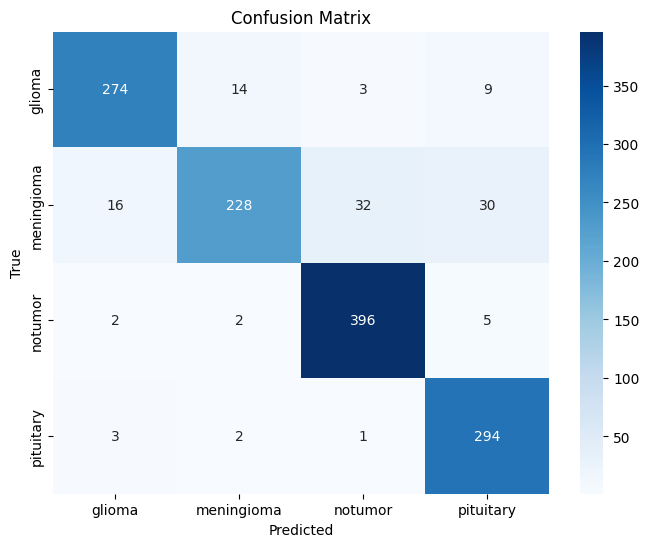

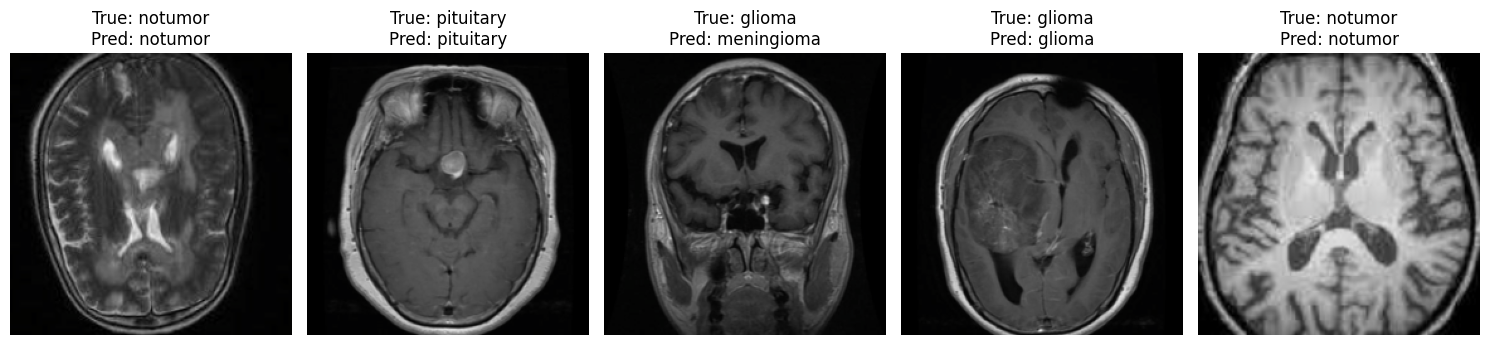

In [ ]:

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        avg_out = self.fc(self.avg_pool(x).view(b, c))
        max_out = self.fc(self.max_pool(x).view(b, c))
        out = avg_out + max_out
        return out.view(b, c, 1, 1)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)

class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.ca = ChannelAttention(in_channels)
        self.sa = SpatialAttention()
        self.stochastic_depth = StochasticDepth(p=0.1, mode="batch")

    def forward(self, x):
        out = x * self.ca(x)
        out = out * self.sa(out)
        return self.stochastic_depth(out) + x

class ImprovedBrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()

        # Initial stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Main blocks with attention
        self.block1 = self._make_block(32, 64, downsample=True)
        self.block2 = self._make_block(64, 128, downsample=True)
        self.block3 = self._make_block(128, 256, downsample=True)
        self.block4 = self._make_block(256, 512, downsample=False)

        # Classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _make_block(self, in_channels, out_channels, downsample):
        layers = []
        if downsample:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1))
        else:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))

        layers.extend([
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            AttentionBlock(out_channels),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            nn.Dropout(0.25)
        ])
        return nn.Sequential(*layers)


    def _initialize_weights(self):
         for m in self.modules():
             if isinstance(m, nn.Conv2d):
                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')  # Changed from 'gelu' to 'relu'
                 if m.bias is not None:
                     nn.init.constant_(m.bias, 0)
             elif isinstance(m, nn.BatchNorm2d):
                 nn.init.constant_(m.weight, 1)
                 nn.init.constant_(m.bias, 0)
             elif isinstance(m, nn.Linear):
                 nn.init.normal_(m.weight, 0, 0.01)
                 nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Enhanced Training Setup
def get_optimizer(model):
    # Separate parameters for differential learning rates
    param_groups = [
        {'params': [p for n, p in model.named_parameters() if 'stem' in n], 'lr': 0.00005},
        {'params': [p for n, p in model.named_parameters() if 'block' in n], 'lr': 0.0001},
        {'params': [p for n, p in model.named_parameters() if 'classifier' in n], 'lr': 0.0002}
    ]
    return optim.AdamW(param_groups, weight_decay=0.01)

def get_scheduler(optimizer, train_loader):
    return optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=[pg['lr']*10 for pg in optimizer.param_groups],
        steps_per_epoch=len(train_loader),
        epochs=50,
        pct_start=0.3,
        anneal_strategy='cos'
    )

# Initialize improved model
model = ImprovedBrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
optimizer = get_optimizer(model)
scheduler = get_scheduler(optimizer, train_loader)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# Enhanced Training Loop with Gradient Clipping
def train_epoch(model, loader, optimizer, criterion, grad_clip=1.0):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in tqdm(loader, desc="Training"):
        inputs = inputs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        optimizer.step()
        scheduler.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validation"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

# Training with improved stability
def train_with_improvements(model, train_loader, test_loader, num_epochs=50):
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    best_acc = 0.0
    patience = 7
    no_improve = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc = validate(model, test_loader, criterion)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.cpu().numpy())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.cpu().numpy())

        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # Early stopping and model checkpointing
        if val_acc > best_acc:
            best_acc = val_acc
            no_improve = 0
            torch.save(model.state_dict(), 'best_improved_cnn.pth')
            print("Saved new best model")
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping after {patience} epochs without improvement")
                break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('improved_training_metrics.png')
    plt.show()

    return model

# Train the improved model
print("Starting training with improved CNN...")
trained_model = train_with_improvements(model, train_loader, test_loader)

# Load and evaluate best model
model.load_state_dict(torch.load('best_improved_cnn.pth'))
evaluate_model(model, test_loader, train_dataset.classes)
show_predictions(model, test_dataset)

Starting training with improved CNN...
Epoch 1/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.59it/s]


Train Loss: 1.1680 Acc: 0.5369
Val Loss: 1.2291 Acc: 0.4638
Saved new best model
Epoch 2/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.83it/s]


Train Loss: 1.0073 Acc: 0.6469
Val Loss: 1.4413 Acc: 0.4432
Epoch 3/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.76it/s]


Train Loss: 0.8924 Acc: 0.7145
Val Loss: 1.1265 Acc: 0.6445
Saved new best model
Epoch 4/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.69it/s]


Train Loss: 0.8282 Acc: 0.7518
Val Loss: 1.0763 Acc: 0.7208
Saved new best model
Epoch 5/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.59it/s]


Train Loss: 0.7807 Acc: 0.7784
Val Loss: 1.1185 Acc: 0.6781
Epoch 6/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.21it/s]


Train Loss: 0.7665 Acc: 0.7826
Val Loss: 0.9650 Acc: 0.7162
Epoch 7/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.80it/s]


Train Loss: 0.7495 Acc: 0.8022
Val Loss: 0.8192 Acc: 0.7788
Saved new best model
Epoch 8/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.58it/s]


Train Loss: 0.7340 Acc: 0.8046
Val Loss: 0.9723 Acc: 0.7216
Epoch 9/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 14.11it/s]


Train Loss: 0.7019 Acc: 0.8277
Val Loss: 0.6894 Acc: 0.8368
Saved new best model
Epoch 10/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.89it/s]


Train Loss: 0.6695 Acc: 0.8468
Val Loss: 0.9174 Acc: 0.7185
Epoch 11/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 14.13it/s]


Train Loss: 0.6662 Acc: 0.8445
Val Loss: 0.8650 Acc: 0.7635
Epoch 12/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.68it/s]


Train Loss: 0.6441 Acc: 0.8610
Val Loss: 0.6498 Acc: 0.8734
Saved new best model
Epoch 13/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.63it/s]


Train Loss: 0.6321 Acc: 0.8636
Val Loss: 0.9357 Acc: 0.7330
Epoch 14/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.55it/s]


Train Loss: 0.6036 Acc: 0.8778
Val Loss: 0.6228 Acc: 0.8726
Epoch 15/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.79it/s]


Train Loss: 0.5700 Acc: 0.8995
Val Loss: 0.6908 Acc: 0.8352
Epoch 16/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.75it/s]


Train Loss: 0.5685 Acc: 0.8992
Val Loss: 0.5891 Acc: 0.8894
Saved new best model
Epoch 17/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.70it/s]


Train Loss: 0.5636 Acc: 0.9055
Val Loss: 0.7511 Acc: 0.7918
Epoch 18/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.45it/s]


Train Loss: 0.5528 Acc: 0.9100
Val Loss: 0.5723 Acc: 0.8986
Saved new best model
Epoch 19/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.44it/s]


Train Loss: 0.5267 Acc: 0.9179
Val Loss: 0.6873 Acc: 0.8391
Epoch 20/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.69it/s]


Train Loss: 0.5208 Acc: 0.9237
Val Loss: 0.5953 Acc: 0.8757
Epoch 21/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.80it/s]


Train Loss: 0.5141 Acc: 0.9272
Val Loss: 0.5578 Acc: 0.8970
Epoch 22/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 14.00it/s]


Train Loss: 0.5036 Acc: 0.9343
Val Loss: 0.4754 Acc: 0.9413
Saved new best model
Epoch 23/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.37it/s]


Train Loss: 0.4942 Acc: 0.9361
Val Loss: 0.4909 Acc: 0.9306
Epoch 24/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.89it/s]


Train Loss: 0.4889 Acc: 0.9400
Val Loss: 0.5016 Acc: 0.9283
Epoch 25/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.54it/s]


Train Loss: 0.4855 Acc: 0.9424
Val Loss: 0.4659 Acc: 0.9436
Saved new best model
Epoch 26/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.95it/s]


Train Loss: 0.4677 Acc: 0.9503
Val Loss: 0.4964 Acc: 0.9352
Epoch 27/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.81it/s]


Train Loss: 0.4720 Acc: 0.9475
Val Loss: 0.4811 Acc: 0.9481
Saved new best model
Epoch 28/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.62it/s]


Train Loss: 0.4626 Acc: 0.9533
Val Loss: 0.4993 Acc: 0.9252
Epoch 29/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.10it/s]


Train Loss: 0.4630 Acc: 0.9538
Val Loss: 0.4485 Acc: 0.9527
Saved new best model
Epoch 30/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.05it/s]


Train Loss: 0.4600 Acc: 0.9562
Val Loss: 0.4674 Acc: 0.9466
Epoch 31/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.75it/s]


Train Loss: 0.4401 Acc: 0.9632
Val Loss: 0.4742 Acc: 0.9367
Epoch 32/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.15it/s]


Train Loss: 0.4483 Acc: 0.9590
Val Loss: 0.4400 Acc: 0.9580
Saved new best model
Epoch 33/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.75it/s]


Train Loss: 0.4309 Acc: 0.9687
Val Loss: 0.5384 Acc: 0.8993
Epoch 34/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.80it/s]


Train Loss: 0.4328 Acc: 0.9659
Val Loss: 0.4161 Acc: 0.9703
Saved new best model
Epoch 35/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.11it/s]


Train Loss: 0.4351 Acc: 0.9664
Val Loss: 0.4466 Acc: 0.9565
Epoch 36/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.49it/s]


Train Loss: 0.4208 Acc: 0.9720
Val Loss: 0.4202 Acc: 0.9710
Saved new best model
Epoch 37/50
----------


Validation: 100%|██████████| 41/41 [00:02<00:00, 13.67it/s]


Train Loss: 0.4249 Acc: 0.9730
Val Loss: 0.4328 Acc: 0.9619
Epoch 38/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.03it/s]


Train Loss: 0.4171 Acc: 0.9765
Val Loss: 0.4054 Acc: 0.9779
Saved new best model
Epoch 39/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.40it/s]


Train Loss: 0.4155 Acc: 0.9762
Val Loss: 0.4168 Acc: 0.9710
Epoch 40/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.76it/s]


Train Loss: 0.4115 Acc: 0.9758
Val Loss: 0.3949 Acc: 0.9786
Saved new best model
Epoch 41/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.01it/s]


Train Loss: 0.4079 Acc: 0.9783
Val Loss: 0.3979 Acc: 0.9817
Saved new best model
Epoch 42/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.85it/s]


Train Loss: 0.4040 Acc: 0.9807
Val Loss: 0.4000 Acc: 0.9794
Epoch 43/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.23it/s]


Train Loss: 0.4009 Acc: 0.9821
Val Loss: 0.4005 Acc: 0.9779
Epoch 44/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.33it/s]


Train Loss: 0.4060 Acc: 0.9807
Val Loss: 0.4049 Acc: 0.9779
Epoch 45/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.53it/s]


Train Loss: 0.3997 Acc: 0.9837
Val Loss: 0.4081 Acc: 0.9771
Epoch 46/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.56it/s]


Train Loss: 0.3981 Acc: 0.9827
Val Loss: 0.3841 Acc: 0.9863
Saved new best model
Epoch 47/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.13it/s]


Train Loss: 0.3999 Acc: 0.9839
Val Loss: 0.3866 Acc: 0.9825
Epoch 48/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.57it/s]


Train Loss: 0.3921 Acc: 0.9867
Val Loss: 0.3905 Acc: 0.9825
Epoch 49/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.46it/s]


Train Loss: 0.3948 Acc: 0.9855
Val Loss: 0.3914 Acc: 0.9825
Epoch 50/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.46it/s]


Train Loss: 0.3925 Acc: 0.9874
Val Loss: 0.3863 Acc: 0.9863


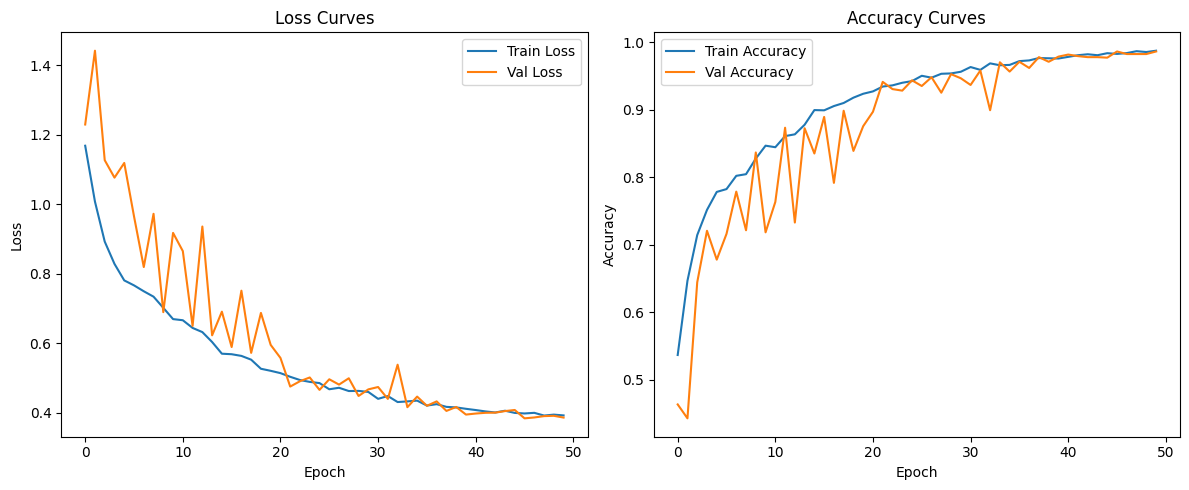


Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.97      0.98       300
  meningioma       0.99      0.97      0.98       306
     notumor       0.99      1.00      1.00       405
   pituitary       0.97      1.00      0.98       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



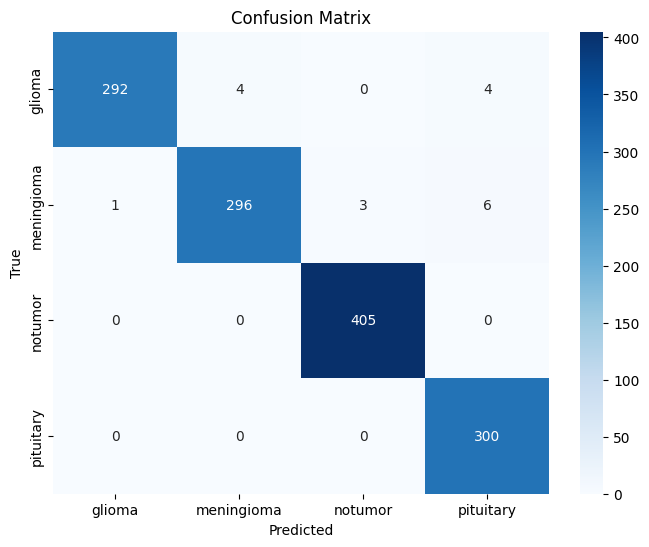

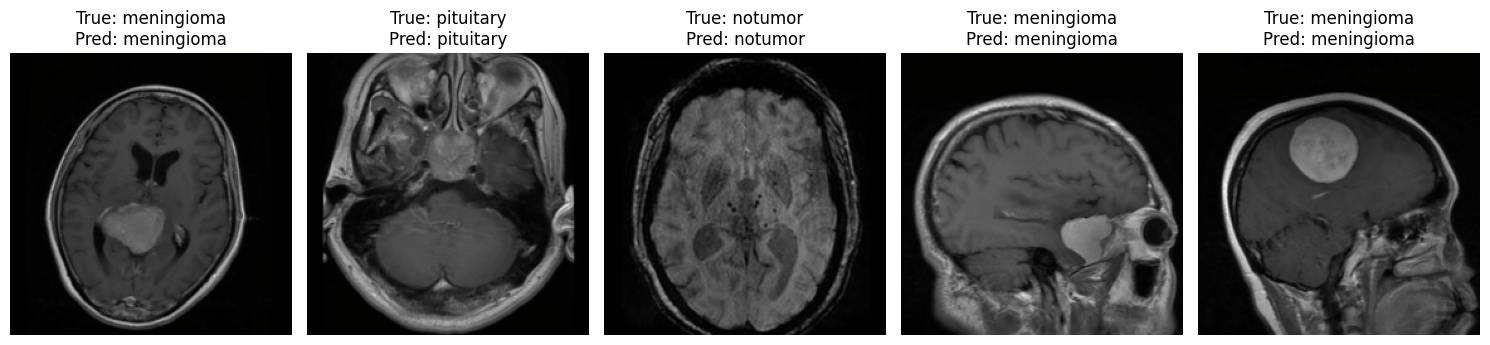

In [ ]:

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        avg_out = self.fc(self.avg_pool(x).view(b, c))
        max_out = self.fc(self.max_pool(x).view(b, c))
        out = avg_out + max_out
        return out.view(b, c, 1, 1)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)

class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.ca = ChannelAttention(in_channels)
        self.sa = SpatialAttention()
        self.stochastic_depth = StochasticDepth(p=0.1, mode="batch")

    def forward(self, x):
        out = x * self.ca(x)
        out = out * self.sa(out)
        return self.stochastic_depth(out) + x

class ImprovedBrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()

        # Initial stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Main blocks with attention
        self.block1 = self._make_block(32, 64, downsample=True)
        self.block2 = self._make_block(64, 128, downsample=True)
        self.block3 = self._make_block(128, 256, downsample=True)
        self.block4 = self._make_block(256, 512, downsample=False)

        # Classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _make_block(self, in_channels, out_channels, downsample):
        layers = []
        if downsample:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1))
        else:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))

        layers.extend([
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            AttentionBlock(out_channels),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            nn.Dropout(0.25)
        ])
        return nn.Sequential(*layers)


    def _initialize_weights(self):
         for m in self.modules():
             if isinstance(m, nn.Conv2d):
                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                 if m.bias is not None:
                     nn.init.constant_(m.bias, 0)
             elif isinstance(m, nn.BatchNorm2d):
                 nn.init.constant_(m.weight, 1)
                 nn.init.constant_(m.bias, 0)
             elif isinstance(m, nn.Linear):
                 nn.init.normal_(m.weight, 0, 0.01)
                 nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Enhanced Training Setup
def get_optimizer(model):
    # Separate parameters for differential learning rates
    param_groups = [
        {'params': [p for n, p in model.named_parameters() if 'stem' in n], 'lr': 0.00005},
        {'params': [p for n, p in model.named_parameters() if 'block' in n], 'lr': 0.0001},
        {'params': [p for n, p in model.named_parameters() if 'classifier' in n], 'lr': 0.0002}
    ]
    return optim.AdamW(param_groups, weight_decay=0.01)

def get_scheduler(optimizer, train_loader):
    return optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=[pg['lr']*10 for pg in optimizer.param_groups],
        steps_per_epoch=len(train_loader),
        epochs=50,
        pct_start=0.3,
        anneal_strategy='cos'
    )

# Initialize improved model
model = ImprovedBrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
optimizer = get_optimizer(model)
scheduler = get_scheduler(optimizer, train_loader)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# Enhanced Training Loop with Gradient Clipping
def train_epoch(model, loader, optimizer, criterion, grad_clip=1.0):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in tqdm(loader, desc="Training"):
        inputs = inputs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        optimizer.step()
        scheduler.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validation"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

# Training with improved stability
def train_with_improvements(model, train_loader, test_loader, num_epochs=50):
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    best_acc = 0.0

    # Early stopping parameters (commented out but kept for reference)
    # patience = 7
    # no_improve = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc = validate(model, test_loader, criterion)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.cpu().numpy())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.cpu().numpy())

        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # Model checkpointing (without early stopping)
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_improved_cnn.pth')
            print("Saved new best model")

        # Early stopping logic (commented out but kept for reference)
        # if val_acc > best_acc:
        #     best_acc = val_acc
        #     no_improve = 0
        #     torch.save(model.state_dict(), 'best_improved_cnn.pth')
        #     print("Saved new best model")
        # else:
        #     no_improve += 1
        #     if no_improve >= patience:
        #         print(f"Early stopping after {patience} epochs without improvement")
        #         break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('improved_training_metrics.png')
    plt.show()

    return model

# Train the improved model
print("Starting training with improved CNN...")
trained_model = train_with_improvements(model, train_loader, test_loader)

# Load and evaluate best model
model.load_state_dict(torch.load('best_improved_cnn.pth'))
evaluate_model(model, test_loader, train_dataset.classes)
show_predictions(model, test_dataset)

To avoid overfitting
- Increase droput rate, early stopping (weight restoration), better lr

Starting training with improved CNN...
Epoch 1/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.47it/s]


Train Loss: 1.3603 Acc: 0.3267
Val Loss: 1.4030 Acc: 0.2288
Saved new best model
Epoch 2/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.16it/s]


Train Loss: 1.3350 Acc: 0.3533
Val Loss: 1.4092 Acc: 0.2296
Saved new best model
Epoch 3/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.73it/s]


Train Loss: 1.3225 Acc: 0.3529
Val Loss: 1.4167 Acc: 0.2387
Saved new best model
Epoch 4/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.96it/s]


Train Loss: 1.3099 Acc: 0.3634
Val Loss: 1.3798 Acc: 0.3066
Saved new best model
Epoch 5/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.53it/s]


Train Loss: 1.2928 Acc: 0.3794
Val Loss: 1.3396 Acc: 0.3692
Saved new best model
Epoch 6/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.50it/s]


Train Loss: 1.2888 Acc: 0.3962
Val Loss: 1.2763 Acc: 0.4668
Saved new best model
Epoch 7/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.59it/s]


Train Loss: 1.2655 Acc: 0.4363
Val Loss: 1.1951 Acc: 0.5538
Saved new best model
Epoch 8/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.29it/s]


Train Loss: 1.2198 Acc: 0.4781
Val Loss: 1.1627 Acc: 0.5675
Saved new best model
Epoch 9/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.60it/s]


Train Loss: 1.2131 Acc: 0.4781
Val Loss: 1.1173 Acc: 0.6209
Saved new best model
Epoch 10/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.28it/s]


Train Loss: 1.1958 Acc: 0.4972
Val Loss: 1.1117 Acc: 0.6209
Epoch 11/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.11it/s]


Train Loss: 1.1697 Acc: 0.5434
Val Loss: 1.0510 Acc: 0.6621
Saved new best model
Epoch 12/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.36it/s]


Train Loss: 1.1616 Acc: 0.5425
Val Loss: 1.0376 Acc: 0.6880
Saved new best model
Epoch 13/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.61it/s]


Train Loss: 1.1469 Acc: 0.5555
Val Loss: 1.0265 Acc: 0.6888
Saved new best model
Epoch 14/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.75it/s]


Train Loss: 1.1407 Acc: 0.5520
Val Loss: 1.0128 Acc: 0.6949
Saved new best model
Epoch 15/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.21it/s]


Train Loss: 1.1221 Acc: 0.5812
Val Loss: 1.0092 Acc: 0.6857
Epoch 16/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.58it/s]


Train Loss: 1.1181 Acc: 0.5581
Val Loss: 1.0482 Acc: 0.6529
Epoch 17/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.67it/s]


Train Loss: 1.1122 Acc: 0.5821
Val Loss: 1.0246 Acc: 0.6743
Epoch 18/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.60it/s]


Train Loss: 1.0976 Acc: 0.5889
Val Loss: 1.0073 Acc: 0.6857
Epoch 19/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.32it/s]


Train Loss: 1.0966 Acc: 0.5713
Val Loss: 0.9997 Acc: 0.6857
Epoch 20/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.36it/s]


Train Loss: 1.0918 Acc: 0.5867
Val Loss: 1.0148 Acc: 0.6720
Epoch 21/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.06it/s]


Train Loss: 1.0738 Acc: 0.6115
Val Loss: 1.0063 Acc: 0.6895
Epoch 22/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.31it/s]


Train Loss: 1.1014 Acc: 0.5840
Val Loss: 0.9905 Acc: 0.6934
Epoch 23/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.29it/s]


Train Loss: 1.0709 Acc: 0.5958
Val Loss: 0.9943 Acc: 0.6995
Saved new best model
Epoch 24/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.41it/s]


Train Loss: 1.0679 Acc: 0.6033
Val Loss: 0.9922 Acc: 0.7018
Saved new best model
Epoch 25/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.27it/s]


Train Loss: 1.0562 Acc: 0.6224
Val Loss: 0.9796 Acc: 0.7124
Saved new best model
Epoch 26/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.72it/s]


Train Loss: 1.0739 Acc: 0.6220
Val Loss: 0.9813 Acc: 0.7170
Saved new best model
Epoch 27/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.39it/s]


Train Loss: 1.0690 Acc: 0.6161
Val Loss: 0.9703 Acc: 0.7201
Saved new best model
Epoch 28/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.28it/s]


Train Loss: 1.0626 Acc: 0.6103
Val Loss: 1.0086 Acc: 0.6995
Epoch 29/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.58it/s]


Train Loss: 1.0504 Acc: 0.6143
Val Loss: 0.9727 Acc: 0.7269
Saved new best model
Epoch 30/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.86it/s]


Train Loss: 1.0685 Acc: 0.5972
Val Loss: 0.9650 Acc: 0.7300
Saved new best model
Epoch 31/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.06it/s]


Train Loss: 1.0560 Acc: 0.6133
Val Loss: 0.9739 Acc: 0.7239
Epoch 32/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.66it/s]


Train Loss: 1.0577 Acc: 0.6141
Val Loss: 0.9644 Acc: 0.7338
Saved new best model
Epoch 33/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.63it/s]


Train Loss: 1.0481 Acc: 0.6457
Val Loss: 0.9490 Acc: 0.7468
Saved new best model
Epoch 34/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.72it/s]


Train Loss: 1.0602 Acc: 0.6085
Val Loss: 0.9433 Acc: 0.7468
Epoch 35/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.23it/s]


Train Loss: 1.0427 Acc: 0.6014
Val Loss: 0.9565 Acc: 0.7361
Epoch 36/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.60it/s]


Train Loss: 1.0320 Acc: 0.6208
Val Loss: 0.9524 Acc: 0.7414
Epoch 37/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.70it/s]


Train Loss: 1.0134 Acc: 0.6465
Val Loss: 0.9301 Acc: 0.7651
Saved new best model
Epoch 38/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.30it/s]


Train Loss: 1.0246 Acc: 0.6430
Val Loss: 0.9499 Acc: 0.7475
Epoch 39/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.14it/s]


Train Loss: 1.0096 Acc: 0.6268
Val Loss: 0.9276 Acc: 0.7620
Epoch 40/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.26it/s]


Train Loss: 1.0257 Acc: 0.6250
Val Loss: 0.9252 Acc: 0.7574
Epoch 41/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.42it/s]


Train Loss: 1.0390 Acc: 0.6303
Val Loss: 0.9397 Acc: 0.7513
Epoch 42/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.74it/s]


Train Loss: 1.0425 Acc: 0.6364
Val Loss: 0.9393 Acc: 0.7521
Epoch 43/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.63it/s]


Train Loss: 1.0563 Acc: 0.6024
Val Loss: 0.9425 Acc: 0.7429
Epoch 44/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 13.05it/s]


Train Loss: 1.0224 Acc: 0.6077
Val Loss: 0.9395 Acc: 0.7506
Epoch 45/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.17it/s]


Train Loss: 1.0200 Acc: 0.6315
Val Loss: 0.9224 Acc: 0.7567
Epoch 46/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.74it/s]


Train Loss: 1.0227 Acc: 0.5991
Val Loss: 0.9385 Acc: 0.7483
Epoch 47/50
----------


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.83it/s]


Train Loss: 1.0231 Acc: 0.6626
Val Loss: 0.9399 Acc: 0.7460
Early stopping after 10 epochs without improvement


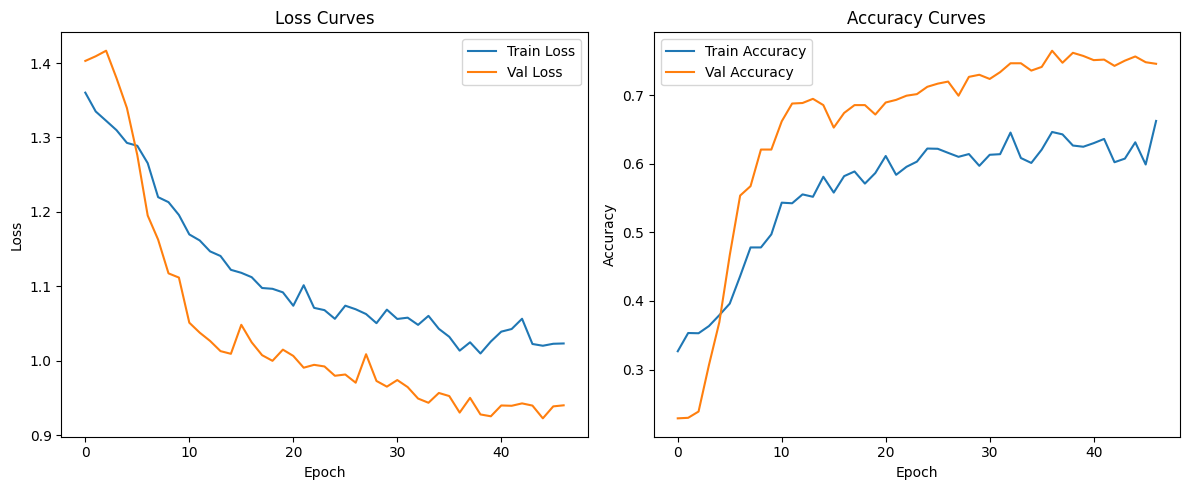


Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.53      0.68       300
  meningioma       0.73      0.55      0.63       306
     notumor       0.82      0.93      0.87       405
   pituitary       0.66      1.00      0.79       300

    accuracy                           0.77      1311
   macro avg       0.79      0.75      0.74      1311
weighted avg       0.79      0.77      0.75      1311



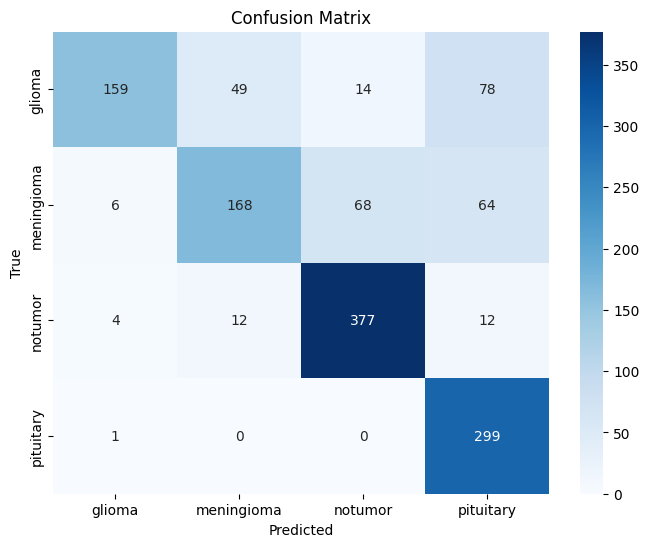

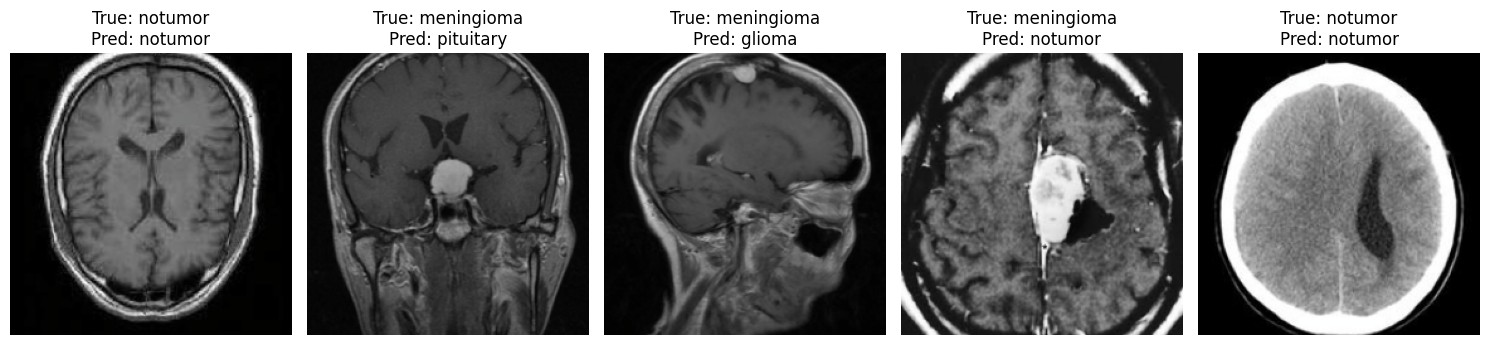

In [ ]:

class DropPath(nn.Module):
    """Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks)."""
    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        if self.drop_prob == 0. or not self.training:
            return x
        keep_prob = 1 - self.drop_prob
        shape = (x.shape[0],) + (1,) * (x.ndim - 1)
        random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
        random_tensor.floor_()  # binarize
        output = x.div(keep_prob) * random_tensor
        return output

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=8):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        avg_out = self.fc(self.avg_pool(x).view(b, c))
        max_out = self.fc(self.max_pool(x).view(b, c))
        out = avg_out + max_out
        return out.view(b, c, 1, 1)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        out = torch.cat([avg_out, max_out], dim=1)
        out = self.conv(out)
        return self.sigmoid(out)

class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.ca = ChannelAttention(in_channels)
        self.sa = SpatialAttention()
        self.stochastic_depth = StochasticDepth(p=0.2, mode="batch")
        self.drop_path = DropPath(0.1) if 0.1 > 0. else nn.Identity()

    def forward(self, x):
        identity = x
        out = x * self.ca(x)
        out = out * self.sa(out)
        out = self.stochastic_depth(out)
        return self.drop_path(out) + identity

class ImprovedBrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()

        # Initial stem with more regularization
        self.stem = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.Dropout2d(0.1),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.GELU(),
            nn.Dropout2d(0.1),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Main blocks with attention and increased dropout
        self.block1 = self._make_block(32, 64, downsample=True, dropout_rate=0.3)
        self.block2 = self._make_block(64, 128, downsample=True, dropout_rate=0.3)
        self.block3 = self._make_block(128, 256, downsample=True, dropout_rate=0.4)
        self.block4 = self._make_block(256, 512, downsample=False, dropout_rate=0.4)

        # Enhanced classifier with more layers and dropout
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.6),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.GELU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

        self._initialize_weights()

    def _make_block(self, in_channels, out_channels, downsample, dropout_rate):
        layers = []
        if downsample:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=2, padding=1))
        else:
            layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))

        layers.extend([
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            nn.Dropout2d(dropout_rate),
            AttentionBlock(out_channels),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.GELU(),
            nn.Dropout2d(dropout_rate)
        ])
        return nn.Sequential(*layers)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.stem(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Enhanced Training Setup
def get_optimizer(model):
    # More conservative learning rates with increased weight decay
    param_groups = [
        {'params': [p for n, p in model.named_parameters() if 'stem' in n], 'lr': 0.00003},
        {'params': [p for n, p in model.named_parameters() if 'block' in n], 'lr': 0.00005},
        {'params': [p for n, p in model.named_parameters() if 'classifier' in n], 'lr': 0.0001}
    ]
    return optim.AdamW(param_groups, weight_decay=0.05)

def get_scheduler(optimizer, train_loader):
    return optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=[pg['lr']*5 for pg in optimizer.param_groups],  # Reduced max_lr multiplier
        steps_per_epoch=len(train_loader),
        epochs=50,
        pct_start=0.2,  # Shorter warmup
        anneal_strategy='cos',
        final_div_factor=1000  # Lower final learning rate
    )

# Enhanced Training Loop with Mixup and Gradient Clipping
def train_epoch(model, loader, optimizer, criterion, grad_clip=0.5):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in tqdm(loader, desc="Training"):
        inputs = inputs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad(set_to_none=True)

        # Apply mixup augmentation
        if np.random.rand() < 0.5:  # 50% chance to apply mixup
            lam = np.random.beta(0.4, 0.4)  # More aggressive mixup
            rand_index = torch.randperm(inputs.size()[0]).to(device)
            labels_a = labels
            labels_b = labels[rand_index]
            inputs = lam * inputs + (1 - lam) * inputs[rand_index]

            outputs = model(inputs)
            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
        else:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

        optimizer.step()
        scheduler.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in tqdm(loader, desc="Validation"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    return running_loss / len(loader.dataset), running_corrects.double() / len(loader.dataset)

# Training with early stopping
def train_with_improvements(model, train_loader, test_loader, num_epochs=50):
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    best_acc = 0.0

    # Enhanced early stopping
    patience = 10
    no_improve = 0
    best_weights = None

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        train_loss, train_acc = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_acc = validate(model, test_loader, criterion)

        # Update history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.cpu().numpy())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.cpu().numpy())

        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # Model checkpointing with early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            no_improve = 0
            best_weights = copy.deepcopy(model.state_dict())
            torch.save(best_weights, 'best_improved_cnn.pth')
            print("Saved new best model")
        else:
            no_improve += 1
            if no_improve >= patience:
                print(f"Early stopping after {patience} epochs without improvement")
                model.load_state_dict(best_weights)  # Restore best weights
                break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('improved_training_metrics.png')
    plt.show()

    return model

# Data Augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))], p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize model and training components
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedBrainTumorCNN(num_classes=4).to(device)
optimizer = get_optimizer(model)
scheduler = get_scheduler(optimizer, train_loader)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.2)  # Stronger label smoothing

# Train the model
print("Starting training with improved CNN...")
trained_model = train_with_improvements(model, train_loader, test_loader)

# Load and evaluate best model
model.load_state_dict(torch.load('best_improved_cnn.pth'))

# Evaluation functions (assuming these are defined elsewhere)
evaluate_model(model, test_loader, train_dataset.classes)
show_predictions(model, test_dataset)

**GRAD CAM**

heatmap applied on needed area/feature to detect/focus

Using device: cuda
Using Kaggle dataset path
Dataset path: /kaggle/input/brain-tumor-mri-dataset


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 167MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Training: 100%|██████████| 179/179 [00:29<00:00,  6.06it/s]


Train Loss: 0.4921 Acc: 0.8176


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.03it/s]


Val Loss: 0.3689 Acc: 0.8619
Saved new best model
Epoch 2/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.84it/s]


Train Loss: 0.2628 Acc: 0.9063


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.32it/s]


Val Loss: 0.2500 Acc: 0.9138
Saved new best model
Epoch 3/50
----------


Training: 100%|██████████| 179/179 [00:31<00:00,  5.73it/s]


Train Loss: 0.2052 Acc: 0.9307


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.57it/s]


Val Loss: 0.2812 Acc: 0.8924
Epoch 4/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.96it/s]


Train Loss: 0.1821 Acc: 0.9363


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.02it/s]


Val Loss: 0.1949 Acc: 0.9275
Saved new best model
Epoch 5/50
----------


Training: 100%|██████████| 179/179 [00:32<00:00,  5.57it/s]


Train Loss: 0.1567 Acc: 0.9487


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.58it/s]


Val Loss: 0.1243 Acc: 0.9611
Saved new best model
Epoch 6/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.85it/s]


Train Loss: 0.1350 Acc: 0.9561


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.1555 Acc: 0.9497
Epoch 7/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.86it/s]


Train Loss: 0.1201 Acc: 0.9587


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.39it/s]


Val Loss: 0.1408 Acc: 0.9504
Epoch 8/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.83it/s]


Train Loss: 0.1025 Acc: 0.9666


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.31it/s]


Val Loss: 0.1277 Acc: 0.9580
Epoch 9/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.90it/s]


Train Loss: 0.1012 Acc: 0.9657


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.24it/s]


Val Loss: 0.1269 Acc: 0.9596
Epoch 10/50
----------


Training: 100%|██████████| 179/179 [00:30<00:00,  5.91it/s]


Train Loss: 0.0933 Acc: 0.9695


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.53it/s]


Val Loss: 0.1448 Acc: 0.9474
Early stopping triggered after 5 epochs without improvement


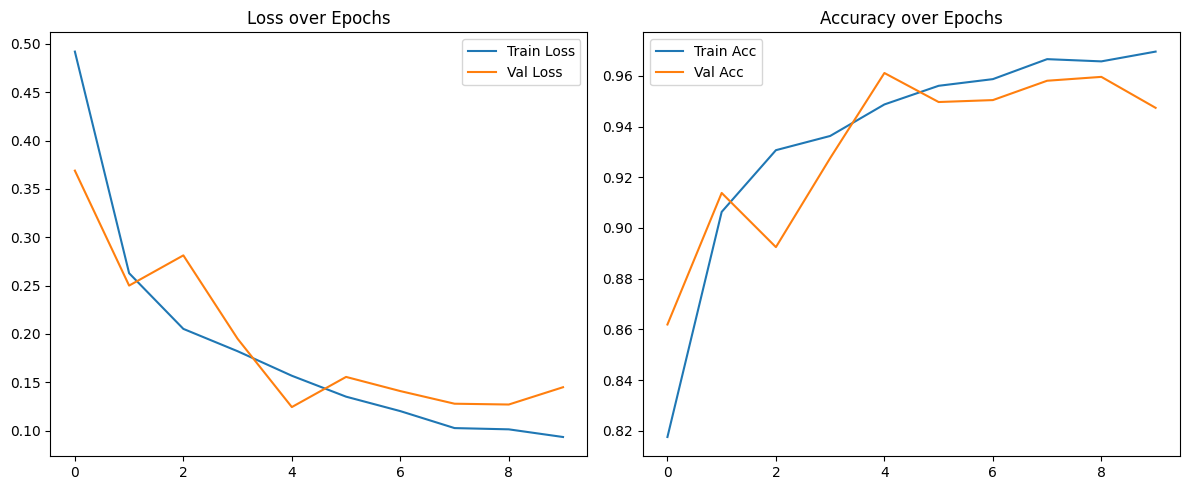


Evaluating model...
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.93      0.96       300
  meningioma       0.95      0.91      0.93       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.93      0.99      0.96       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



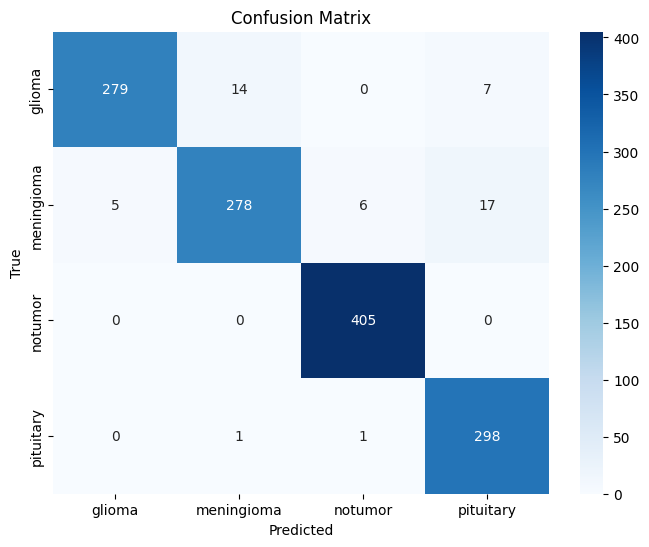


Generating Grad-CAM visualizations...


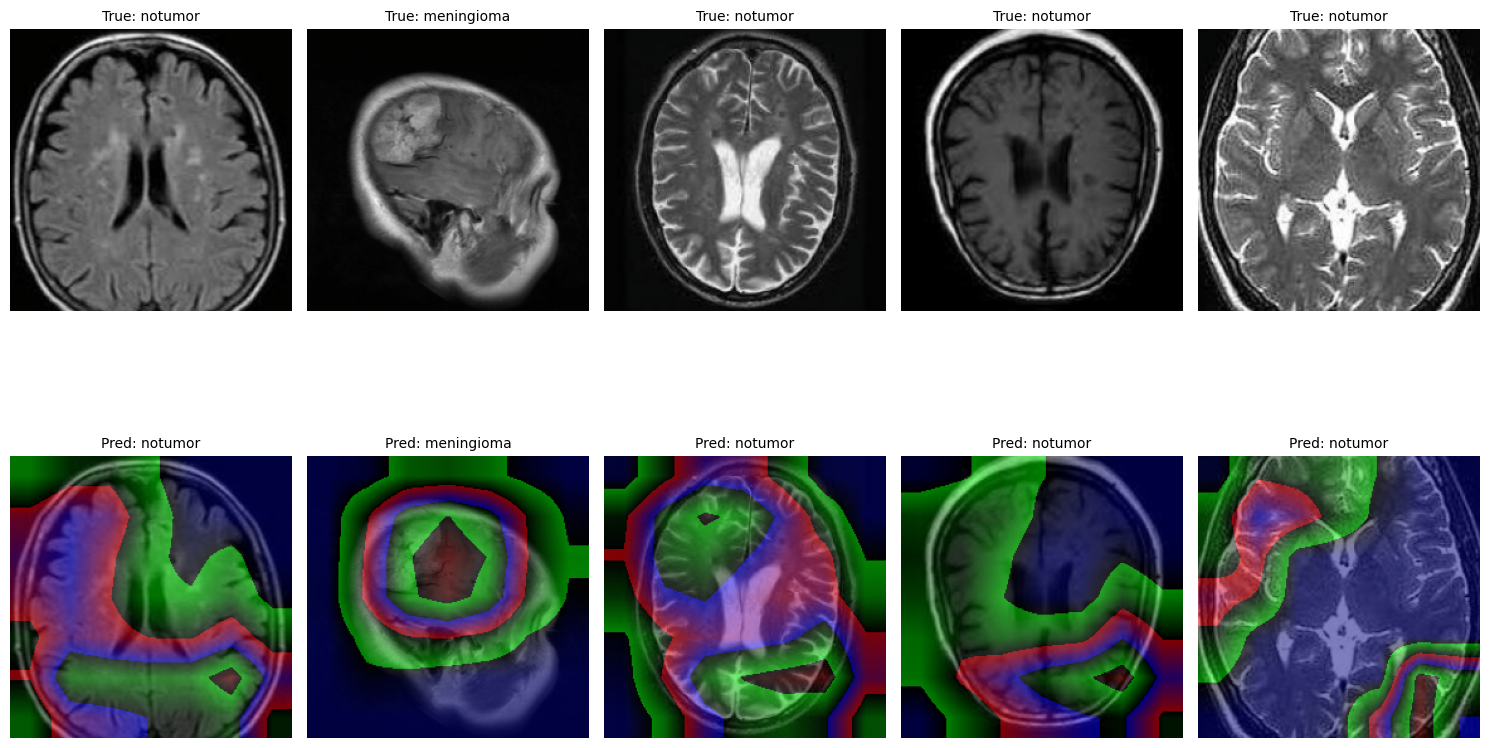

In [ ]:

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Dataset Class with Error Handling
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='Training'):
        self.root_dir = os.path.join(root_dir, split)
        if not os.path.exists(self.root_dir):
            raise FileNotFoundError(f"Dataset directory not found: {self.root_dir}")

        self.transform = transform
        self.classes = sorted(os.listdir(self.root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()
        self.class_counts = self._get_class_counts()

    def _load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            if not os.path.isdir(class_path):
                continue

            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, img_name)
                    images.append((img_path, self.class_to_idx[class_name]))
        return images

    def _get_class_counts(self):
        counts = [0] * len(self.classes)
        for _, label in self.images:
            counts[label] += 1
        return counts

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            dummy_img = torch.rand(3, 224, 224)
            return dummy_img, label

# 2. Data Augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.GaussianBlur(kernel_size=(3,3)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# 3. Prepare Dataset Path
def prepare_dataset_path():
    # For Kaggle environment
    if os.path.exists('/kaggle/input/brain-tumor-mri-dataset'):
        print("Using Kaggle dataset path")
        return '/kaggle/input/brain-tumor-mri-dataset'

    # For local environment
    local_path = "Brain_Tumor_Data"
    if os.path.exists(local_path):
        print("Using local dataset path")
        return local_path

    raise FileNotFoundError("Could not find dataset in either Kaggle or local paths")

try:
    path = prepare_dataset_path()
    print(f"Dataset path: {path}")
except FileNotFoundError as e:
    print(e)
    exit()

# 4. Create Datasets and DataLoaders
train_dataset = BrainTumorDataset(path, transform=data_transforms['train'], split='Training')
test_dataset = BrainTumorDataset(path, transform=data_transforms['test'], split='Testing')

# Calculate class weights
class_weights = 1. / torch.tensor(train_dataset.class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# 5. ResNet Model
def create_improved_model(num_classes=4):
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

    # Freeze layers
    for name, param in model.named_parameters():
        if 'layer4' not in name and 'fc' not in name:
            param.requires_grad = False

    # Enhanced classifier
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(num_ftrs, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.6),
        nn.Linear(512, num_classes)
    )
    return model.to(device)

model = create_improved_model()
print(model)

# 6. Training Setup
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

# 7. Training Function
def train_improved_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    patience = 5
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        scheduler.step()
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = (running_corrects.double() / len(train_dataset)).cpu().numpy()
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Validation"):
                inputs = inputs.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = (running_corrects.double() / len(test_dataset)).cpu().numpy()
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc)

        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Early stopping
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            epochs_without_improvement = 0
            torch.save(model.state_dict(), 'best_model_improved.pth')
            print("Saved new best model")
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping triggered after {patience} epochs without improvement")
                break

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model

# 8. Grad-CAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        target_layer.register_forward_hook(self.save_activations)
        target_layer.register_full_backward_hook(self.save_gradients)

    def save_activations(self, module, input, output):
        self.activations = output.detach()

    def save_gradients(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def forward(self, x):
        return self.model(x)

    def backward(self, outputs):
        self.model.zero_grad()
        one_hot = torch.zeros_like(outputs)
        one_hot[0][torch.argmax(outputs)] = 1
        outputs.backward(gradient=one_hot, retain_graph=True)

    def generate(self, x):
        # Forward pass
        outputs = self.forward(x)

        # Backward pass
        self.backward(outputs)

        # Pool gradients
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])

        # Weight activations
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        # Generate heatmap
        heatmap = torch.mean(activations, dim=0).detach().cpu()
        heatmap = F.relu(heatmap)
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-10)
        heatmap = cv2.resize(heatmap.numpy(), (x.shape[3], x.shape[2]))

        return heatmap, torch.argmax(outputs).item()

def visualize_gradcam(model, dataset, num_samples=5):
    # Get target layer (last conv layer in ResNet18)
    target_layer = model.layer4[-1].conv2
    gradcam = GradCAM(model, target_layer)

    # Select random samples
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image_tensor = image.unsqueeze(0).to(device)

        # Get Grad-CAM heatmap
        heatmap, pred = gradcam.generate(image_tensor)

        # Prepare original image
        img = image.cpu().numpy().transpose(1, 2, 0)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        # Create heatmap overlay
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        superimposed_img = cv2.addWeighted(np.uint8(255 * img), 0.5,
                                         np.uint8(255 * heatmap_colored), 0.5, 0)
        superimposed_img = superimposed_img / 255.0

        # Plot original
        plt.subplot(2, num_samples, i+1)
        plt.imshow(img)
        plt.title(f'True: {dataset.classes[label]}', fontsize=10)
        plt.axis('off')

        # Plot heatmap
        plt.subplot(2, num_samples, num_samples+i+1)
        plt.imshow(superimposed_img)
        plt.title(f'Pred: {dataset.classes[pred]}', fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 9. Evaluation Functions
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 10. Main Execution
if __name__ == "__main__":
    # Train the model
    print("Starting training...")
    trained_model = train_improved_model(model, train_loader, test_loader, criterion, optimizer, scheduler)

    # Load best model
    model.load_state_dict(torch.load('best_model_improved.pth'))

    # Evaluate
    print("\nEvaluating model...")
    evaluate_model(model, test_loader)

    # Visualize with Grad-CAM
    print("\nGenerating Grad-CAM visualizations...")
    visualize_gradcam(model, test_dataset)

In [ ]:
PATH="model.pth"
torch.save(model.state_dict(),PATH)

GRAD CAM -- CNN


Using device: cuda
BrainTumorCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, 

Training: 100%|██████████| 179/179 [00:35<00:00,  5.01it/s]


Train Loss: 0.9278 Acc: 0.6350


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.45it/s]


Val Loss: 1.2187 Acc: 0.5072
Saved new best model
Epoch 2/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.04it/s]


Train Loss: 0.7311 Acc: 0.7216


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.77it/s]


Val Loss: 1.1185 Acc: 0.5767
Saved new best model
Epoch 3/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.6305 Acc: 0.7631


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.84it/s]


Val Loss: 1.0748 Acc: 0.5934
Saved new best model
Epoch 4/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.5518 Acc: 0.7950


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.8663 Acc: 0.6659
Saved new best model
Epoch 5/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.13it/s]


Train Loss: 0.4984 Acc: 0.8192


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.25it/s]


Val Loss: 0.6723 Acc: 0.7376
Saved new best model
Epoch 6/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.08it/s]


Train Loss: 0.4480 Acc: 0.8370


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.18it/s]


Val Loss: 1.0143 Acc: 0.6789
Epoch 7/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.4111 Acc: 0.8531


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.64it/s]


Val Loss: 0.9709 Acc: 0.6972
Epoch 8/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.3845 Acc: 0.8638


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.15it/s]


Val Loss: 0.7808 Acc: 0.7529
Saved new best model
Epoch 9/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.13it/s]


Train Loss: 0.3663 Acc: 0.8662


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.23it/s]


Val Loss: 0.8089 Acc: 0.7368
Epoch 10/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.3466 Acc: 0.8746


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.06it/s]


Val Loss: 0.6904 Acc: 0.7788
Saved new best model
Epoch 11/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.14it/s]


Train Loss: 0.3276 Acc: 0.8866


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.22it/s]


Val Loss: 0.6588 Acc: 0.7895
Saved new best model
Epoch 12/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.08it/s]


Train Loss: 0.3091 Acc: 0.8955


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.95it/s]


Val Loss: 0.7121 Acc: 0.7696
Epoch 13/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.10it/s]


Train Loss: 0.3162 Acc: 0.8927


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.05it/s]


Val Loss: 0.7168 Acc: 0.7780
Epoch 14/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.07it/s]


Train Loss: 0.3038 Acc: 0.8976


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.93it/s]


Val Loss: 0.7222 Acc: 0.7719
Epoch 15/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.98it/s]


Train Loss: 0.3013 Acc: 0.8983


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.89it/s]


Val Loss: 0.7148 Acc: 0.7757
Epoch 16/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.99it/s]


Train Loss: 0.3074 Acc: 0.8883


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.38it/s]


Val Loss: 0.6891 Acc: 0.7849
Epoch 17/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.02it/s]


Train Loss: 0.2985 Acc: 0.8974


Validation: 100%|██████████| 41/41 [00:04<00:00, 10.06it/s]


Val Loss: 0.7030 Acc: 0.7796
Epoch 18/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.3012 Acc: 0.8930


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.54it/s]


Val Loss: 0.7248 Acc: 0.7704
Epoch 19/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.2969 Acc: 0.8967


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.95it/s]


Val Loss: 0.6961 Acc: 0.7834
Epoch 20/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.07it/s]


Train Loss: 0.2997 Acc: 0.8988


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.7060 Acc: 0.7757
Epoch 21/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.2981 Acc: 0.8967


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.72it/s]


Val Loss: 0.7228 Acc: 0.7834
Epoch 22/50
----------


Training: 100%|██████████| 179/179 [00:36<00:00,  4.97it/s]


Train Loss: 0.2990 Acc: 0.8941


Validation: 100%|██████████| 41/41 [00:04<00:00,  9.99it/s]


Val Loss: 0.6573 Acc: 0.7849
Epoch 23/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.99it/s]


Train Loss: 0.2920 Acc: 0.8936


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.52it/s]


Val Loss: 0.7043 Acc: 0.7674
Epoch 24/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.02it/s]


Train Loss: 0.3050 Acc: 0.8899


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.76it/s]


Val Loss: 0.5855 Acc: 0.8002
Saved new best model
Epoch 25/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.03it/s]


Train Loss: 0.2927 Acc: 0.8964


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.63it/s]


Val Loss: 0.6905 Acc: 0.7681
Epoch 26/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.98it/s]


Train Loss: 0.2780 Acc: 0.9011


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.06it/s]


Val Loss: 0.6680 Acc: 0.7826
Epoch 27/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.04it/s]


Train Loss: 0.2817 Acc: 0.9021


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.71it/s]


Val Loss: 0.5376 Acc: 0.8223
Saved new best model
Epoch 28/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.2873 Acc: 0.8965


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.89it/s]


Val Loss: 0.5241 Acc: 0.8238
Saved new best model
Epoch 29/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.2680 Acc: 0.9046


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.97it/s]


Val Loss: 0.5077 Acc: 0.8261
Saved new best model
Epoch 30/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.02it/s]


Train Loss: 0.2542 Acc: 0.9123


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.07it/s]


Val Loss: 0.4857 Acc: 0.8375
Saved new best model
Epoch 31/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.08it/s]


Train Loss: 0.2553 Acc: 0.9118


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.17it/s]


Val Loss: 0.4900 Acc: 0.8383
Saved new best model
Epoch 32/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.10it/s]


Train Loss: 0.2446 Acc: 0.9154


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.5551 Acc: 0.8200
Epoch 33/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.13it/s]


Train Loss: 0.2285 Acc: 0.9223


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.84it/s]


Val Loss: 0.3932 Acc: 0.8619
Saved new best model
Epoch 34/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.11it/s]


Train Loss: 0.2252 Acc: 0.9196


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.41it/s]


Val Loss: 0.4121 Acc: 0.8558
Epoch 35/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.04it/s]


Train Loss: 0.2235 Acc: 0.9223


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.97it/s]


Val Loss: 0.4320 Acc: 0.8505
Epoch 36/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.2103 Acc: 0.9266


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.90it/s]


Val Loss: 0.4377 Acc: 0.8627
Saved new best model
Epoch 37/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.04it/s]


Train Loss: 0.2064 Acc: 0.9249


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.18it/s]


Val Loss: 0.3700 Acc: 0.8719
Saved new best model
Epoch 38/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.12it/s]


Train Loss: 0.1778 Acc: 0.9356


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.89it/s]


Val Loss: 0.3446 Acc: 0.8757
Saved new best model
Epoch 39/50
----------


Training: 100%|██████████| 179/179 [00:34<00:00,  5.12it/s]


Train Loss: 0.1856 Acc: 0.9324


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.00it/s]


Val Loss: 0.3983 Acc: 0.8673
Epoch 40/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.07it/s]


Train Loss: 0.1751 Acc: 0.9384


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.15it/s]


Val Loss: 0.3746 Acc: 0.8841
Saved new best model
Epoch 41/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.1680 Acc: 0.9438


Validation: 100%|██████████| 41/41 [00:03<00:00, 12.20it/s]


Val Loss: 0.3200 Acc: 0.8955
Saved new best model
Epoch 42/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.1721 Acc: 0.9440


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.92it/s]


Val Loss: 0.3013 Acc: 0.8993
Saved new best model
Epoch 43/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.06it/s]


Train Loss: 0.1577 Acc: 0.9443


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.87it/s]


Val Loss: 0.2880 Acc: 0.9092
Saved new best model
Epoch 44/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.05it/s]


Train Loss: 0.1576 Acc: 0.9464


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.77it/s]


Val Loss: 0.2845 Acc: 0.9085
Epoch 45/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.04it/s]


Train Loss: 0.1557 Acc: 0.9477


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.52it/s]


Val Loss: 0.3142 Acc: 0.8924
Epoch 46/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.00it/s]


Train Loss: 0.1471 Acc: 0.9498


Validation: 100%|██████████| 41/41 [00:03<00:00, 10.76it/s]


Val Loss: 0.3086 Acc: 0.8932
Epoch 47/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  4.98it/s]


Train Loss: 0.1475 Acc: 0.9494


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.77it/s]


Val Loss: 0.2886 Acc: 0.9085
Epoch 48/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.00it/s]


Train Loss: 0.1514 Acc: 0.9463


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.75it/s]


Val Loss: 0.3250 Acc: 0.8909
Epoch 49/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.00it/s]


Train Loss: 0.1532 Acc: 0.9498


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.54it/s]


Val Loss: 0.3030 Acc: 0.9077
Epoch 50/50
----------


Training: 100%|██████████| 179/179 [00:35<00:00,  5.01it/s]


Train Loss: 0.1543 Acc: 0.9480


Validation: 100%|██████████| 41/41 [00:03<00:00, 11.36it/s]


Val Loss: 0.3036 Acc: 0.9047


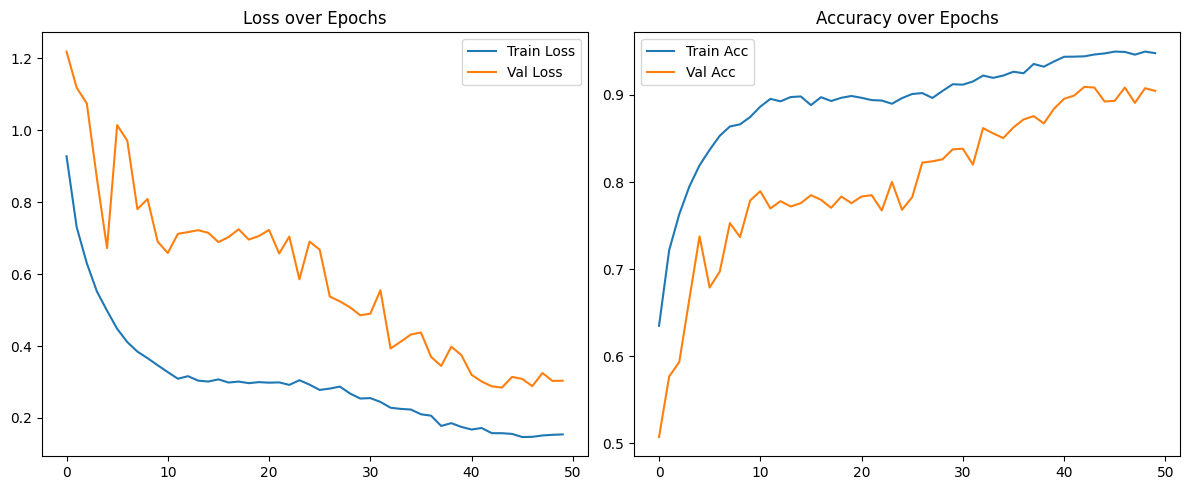


Evaluating model...

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.92      0.94       300
  meningioma       0.95      0.72      0.82       306
     notumor       0.91      0.98      0.94       405
   pituitary       0.85      1.00      0.92       300

    accuracy                           0.91      1311
   macro avg       0.91      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



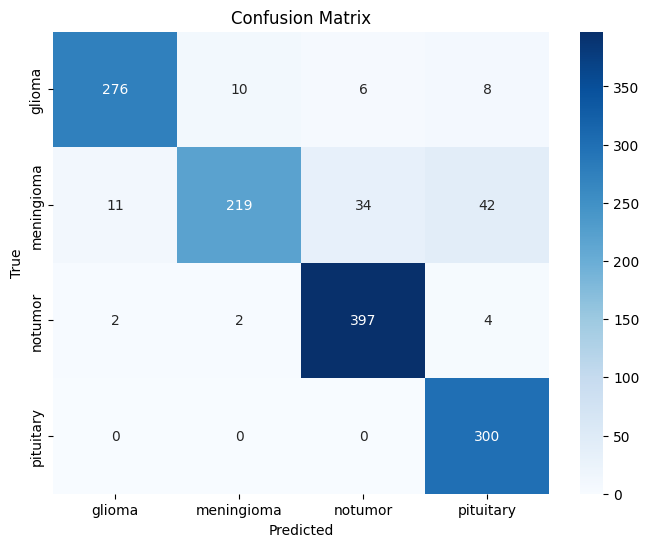


Showing sample predictions...


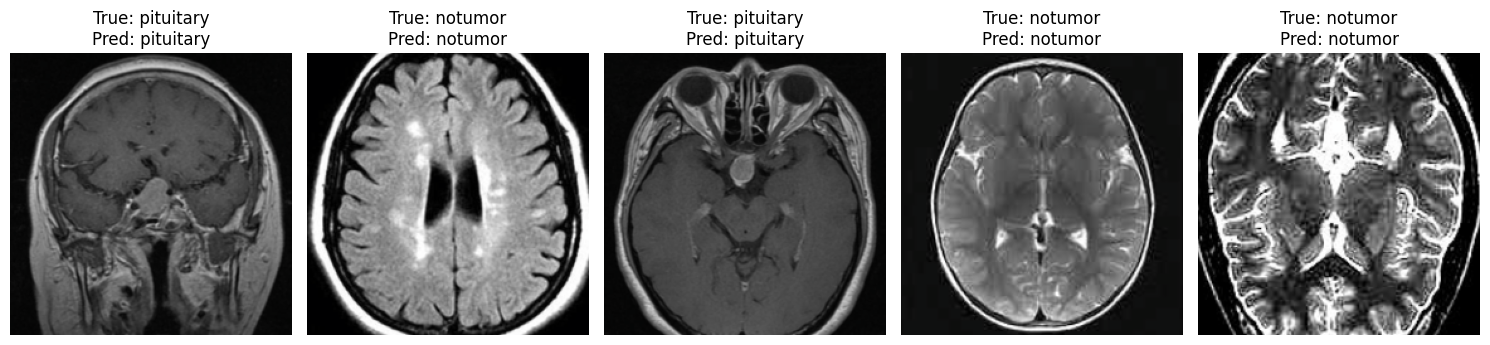


Generating Grad-CAM visualizations...


RuntimeError: Output 0 of BackwardHookFunctionBackward is a view and is being modified inplace. This view was created inside a custom Function (or because an input was returned as-is) and the autograd logic to handle view+inplace would override the custom backward associated with the custom Function, leading to incorrect gradients. This behavior is forbidden. You can fix this by cloning the output of the custom Function.

<Figure size 1500x1000 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm
import cv2
import torch.nn.functional as F

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Dataset Class
class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None, split='Training'):
        self.root_dir = os.path.join(root_dir, split)
        if not os.path.exists(self.root_dir):
            raise FileNotFoundError(f"Dataset directory not found: {self.root_dir}")

        self.transform = transform
        self.classes = sorted(os.listdir(self.root_dir))
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()
        self.class_counts = self._get_class_counts()

    def _load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            if not os.path.isdir(class_path):
                continue

            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_path, img_name)
                    images.append((img_path, self.class_to_idx[class_name]))
        return images

    def _get_class_counts(self):
        counts = [0] * len(self.classes)
        for _, label in self.images:
            counts[label] += 1
        return counts

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            return image, label
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            dummy_img = torch.rand(3, 224, 224)
            return dummy_img, label

# Data Augmentation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.GaussianBlur(kernel_size=(3,3)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets and dataloaders
path = '/kaggle/input/brain-tumor-mri-dataset'  # Replace with your actual path
train_dataset = BrainTumorDataset(path, transform=data_transforms['train'], split='Training')
test_dataset = BrainTumorDataset(path, transform=data_transforms['test'], split='Testing')

# Calculate class weights for imbalanced data
class_weights = 1. / torch.tensor(train_dataset.class_counts, dtype=torch.float)
class_weights = class_weights.to(device)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# CNN-from-scratch model with Grad-CAM support
class BrainTumorCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(BrainTumorCNN, self).__init__()

        # Feature extraction
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 3 (target layer for Grad-CAM)
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            # Conv Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def get_activations(self, x):
        # Forward pass through feature extractor only
        return self.features(x)

# Initialize model
model = BrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
print(model)

# Training setup
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0.0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs = inputs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        scheduler.step()
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = (running_corrects.double() / len(train_dataset)).cpu().numpy()
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Validation"):
                inputs = inputs.to(device, non_blocking=True)
                labels = labels.to(device, non_blocking=True)

                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(test_dataset)
        epoch_acc = (running_corrects.double() / len(test_dataset)).cpu().numpy()
        val_losses.append(epoch_loss)
        val_accs.append(epoch_acc)

        print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        # Save best model
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), 'best_cnn_model.pth')
            print("Saved new best model")

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(val_accs, label='Val Acc')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_metrics.png')
    plt.show()

    return model

# Grad-CAM Implementation for CNN
class GradCAM_CNN:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        target_layer.register_forward_hook(self.save_activations)
        target_layer.register_full_backward_hook(self.save_gradients)

    def save_activations(self, module, input, output):
        self.activations = output.detach()

    def save_gradients(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def forward(self, x):
        return self.model(x)

    def backward(self, outputs):
        self.model.zero_grad()
        one_hot = torch.zeros_like(outputs)
        one_hot[0][torch.argmax(outputs)] = 1
        outputs.backward(gradient=one_hot, retain_graph=True)

    def generate(self, x):
        # Forward pass
        outputs = self.forward(x)

        # Backward pass
        self.backward(outputs)

        # Pool gradients
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])

        # Weight activations
        activations = self.activations[0]
        for i in range(activations.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]

        # Generate heatmap
        heatmap = torch.mean(activations, dim=0).detach().cpu()
        heatmap = F.relu(heatmap)
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-10)
        heatmap = cv2.resize(heatmap.numpy(), (x.shape[3], x.shape[2]))

        return heatmap, torch.argmax(outputs).item()

def visualize_gradcam(model, dataset, num_samples=5):
    # Get target layer (3rd conv block's last conv layer)
    target_layer = model.features[12]  # The second conv in block 3
    gradcam = GradCAM_CNN(model, target_layer)

    # Select random samples
    indices = np.random.choice(len(dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image_tensor = image.unsqueeze(0).to(device)

        # Get Grad-CAM heatmap
        heatmap, pred = gradcam.generate(image_tensor)

        # Prepare original image
        img = image.cpu().numpy().transpose(1, 2, 0)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)

        # Create heatmap overlay
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        superimposed_img = cv2.addWeighted(np.uint8(255 * img), 0.5,
                                         np.uint8(255 * heatmap_colored), 0.5, 0)
        superimposed_img = superimposed_img / 255.0

        # Plot original
        plt.subplot(2, num_samples, i+1)
        plt.imshow(img)
        plt.title(f'True: {dataset.classes[label]}', fontsize=10)
        plt.axis('off')

        # Plot heatmap
        plt.subplot(2, num_samples, num_samples+i+1)
        plt.imshow(superimposed_img)
        plt.title(f'Pred: {dataset.classes[pred]}', fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('gradcam_visualization.png')
    plt.show()

# Evaluation functions
def evaluate_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrix.png')
    plt.show()

def show_predictions(model, test_dataset, num_samples=5):
    model.eval()
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        image, label = test_dataset[idx]
        image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image)
            _, pred = torch.max(output, 1)

        image = image.squeeze().cpu().numpy()
        image = np.transpose(image, (1, 2, 0))
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = np.clip(image, 0, 1)

        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(f'True: {test_dataset.classes[label]}\nPred: {test_dataset.classes[pred.item()]}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('sample_predictions.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Train the model
    print("Starting training...")
    trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler)

    # Load best model
    model.load_state_dict(torch.load('best_cnn_model.pth'))

    # Evaluate
    print("\nEvaluating model...")
    evaluate_model(model, test_loader, train_dataset.classes)

    # Show predictions
    print("\nShowing sample predictions...")
    show_predictions(model, test_dataset)

    # Visualize with Grad-CAM
    print("\nGenerating Grad-CAM visualizations...")
    visualize_gradcam(model, test_dataset)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# from PIL import Image
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# from tqdm import tqdm
# import cv2
# import torch.nn.functional as F

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# # Dataset Class
# class BrainTumorDataset(Dataset):
#     def __init__(self, root_dir, transform=None, split='Training'):
#         self.root_dir = os.path.join(root_dir, split)
#         if not os.path.exists(self.root_dir):
#             raise FileNotFoundError(f"Dataset directory not found: {self.root_dir}")

#         self.transform = transform
#         self.classes = sorted(os.listdir(self.root_dir))
#         self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
#         self.images = self._load_images()
#         self.class_counts = self._get_class_counts()

#     def _load_images(self):
#         images = []
#         for class_name in self.classes:
#             class_path = os.path.join(self.root_dir, class_name)
#             if not os.path.isdir(class_path):
#                 continue

#             for img_name in os.listdir(class_path):
#                 if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
#                     img_path = os.path.join(class_path, img_name)
#                     images.append((img_path, self.class_to_idx[class_name]))
#         return images

#     def _get_class_counts(self):
#         counts = [0] * len(self.classes)
#         for _, label in self.images:
#             counts[label] += 1
#         return counts

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         img_path, label = self.images[idx]
#         try:
#             image = Image.open(img_path).convert('RGB')
#             if self.transform:
#                 image = self.transform(image)
#             return image, label
#         except Exception as e:
#             print(f"Error loading image {img_path}: {e}")
#             dummy_img = torch.rand(3, 224, 224)
#             return dummy_img, label

# # Data Augmentation
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize(256),
#         transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip(),
#         transforms.RandomRotation(30),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2),
#         transforms.GaussianBlur(kernel_size=(3,3)),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

# # Create datasets and dataloaders
# path = '/kaggle/input/brain-tumor-mri-dataset'
# train_dataset = BrainTumorDataset(path, transform=data_transforms['train'], split='Training')
# test_dataset = BrainTumorDataset(path, transform=data_transforms['test'], split='Testing')

# class_weights = 1. / torch.tensor(train_dataset.class_counts, dtype=torch.float)
# class_weights = class_weights.to(device)

# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# # CNN model with all ReLU inplace=False for Grad-CAM compatibility
# class BrainTumorCNN(nn.Module):
#     def __init__(self, num_classes=4):
#         super(BrainTumorCNN, self).__init__()

#         # Feature extraction with all inplace=False
#         self.features = nn.Sequential(
#             # Conv Block 1
#             nn.Conv2d(3, 32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(inplace=False),
#             nn.Conv2d(32, 32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(inplace=False),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.25),

#             # Conv Block 2
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(inplace=False),
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(inplace=False),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.25),

#             # Conv Block 3 (target layer for Grad-CAM)
#             nn.Conv2d(64, 128, kernel_size=3, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace=False),
#             nn.Conv2d(128, 128, kernel_size=3, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace=False),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.25),

#             # Conv Block 4
#             nn.Conv2d(128, 256, kernel_size=3, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=False),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=False),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout(0.25)
#         )

#         # Classifier
#         self.classifier = nn.Sequential(
#             nn.Linear(256 * 14 * 14, 512),
#             nn.BatchNorm1d(512),
#             nn.ReLU(inplace=False),
#             nn.Dropout(0.5),
#             nn.Linear(512, num_classes)
#         )

#         self._initialize_weights()

#     def _initialize_weights(self):
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
#                 if m.bias is not None:
#                     nn.init.constant_(m.bias, 0)
#             elif isinstance(m, nn.BatchNorm2d):
#                 nn.init.constant_(m.weight, 1)
#                 nn.init.constant_(m.bias, 0)
#             elif isinstance(m, nn.Linear):
#                 nn.init.normal_(m.weight, 0, 0.01)
#                 nn.init.constant_(m.bias, 0)

#     def forward(self, x):
#         x = self.features(x)
#         x = torch.flatten(x, 1)
#         x = self.classifier(x)
#         return x

# # Initialize model
# model = BrainTumorCNN(num_classes=len(train_dataset.classes)).to(device)
# print(model)

# # Training setup
# criterion = nn.CrossEntropyLoss(weight=class_weights)
# optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15, eta_min=1e-6)

# # Training function
# def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=50):
#     best_acc = 0.0
#     train_losses, val_losses = [], []
#     train_accs, val_accs = [], []

#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch+1}/{num_epochs}')
#         print('-' * 10)

#         # Training phase
#         model.train()
#         running_loss = 0.0
#         running_corrects = 0

#         for inputs, labels in tqdm(train_loader, desc="Training"):
#             inputs = inputs.to(device, non_blocking=True)
#             labels = labels.to(device, non_blocking=True)

#             optimizer.zero_grad()
#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#         scheduler.step()
#         epoch_loss = running_loss / len(train_dataset)
#         epoch_acc = (running_corrects.double() / len(train_dataset)).cpu().numpy()
#         train_losses.append(epoch_loss)
#         train_accs.append(epoch_acc)

#         print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#         # Validation phase
#         model.eval()
#         running_loss = 0.0
#         running_corrects = 0

#         with torch.no_grad():
#             for inputs, labels in tqdm(test_loader, desc="Validation"):
#                 inputs = inputs.to(device, non_blocking=True)
#                 labels = labels.to(device, non_blocking=True)

#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)

#         epoch_loss = running_loss / len(test_dataset)
#         epoch_acc = (running_corrects.double() / len(test_dataset)).cpu().numpy()
#         val_losses.append(epoch_loss)
#         val_accs.append(epoch_acc)

#         print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

#         if epoch_acc > best_acc:
#             best_acc = epoch_acc
#             torch.save(model.state_dict(), 'best_cnn_model.pth')
#             print("Saved new best model")

#     # Plot training history
#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     plt.plot(train_losses, label='Train Loss')
#     plt.plot(val_losses, label='Val Loss')
#     plt.title('Loss over Epochs')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(train_accs, label='Train Acc')
#     plt.plot(val_accs, label='Val Acc')
#     plt.title('Accuracy over Epochs')
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig('training_metrics.png')
#     plt.show()

#     return model

# # Robust Grad-CAM Implementation
# class GradCAM:
#     def __init__(self, model, target_layer):
#         self.model = model
#         self.target_layer = target_layer
#         self.gradients = None
#         self.activations = None

#         # Forward hook
#         def forward_hook(module, input, output):
#             self.activations = output
#             return None

#         # Backward hook
#         def backward_hook(module, grad_input, grad_output):
#             self.gradients = grad_output[0]
#             return None

#         self.forward_handle = target_layer.register_forward_hook(forward_hook)
#         self.backward_handle = target_layer.register_full_backward_hook(backward_hook)

#     def __del__(self):
#         self.forward_handle.remove()
#         self.backward_handle.remove()

#     def forward(self, x):
#         return self.model(x)

#     def backward(self, outputs):
#         self.model.zero_grad()
#         one_hot = torch.zeros_like(outputs)
#         one_hot[0][torch.argmax(outputs)] = 1
#         outputs.backward(gradient=one_hot, retain_graph=True)

#     def generate(self, x):
#         # Forward pass
#         outputs = self.forward(x)

#         # Backward pass
#         self.backward(outputs)

#         # Detach and clone to avoid inplace operations
#         gradients = self.gradients.detach().clone()
#         activations = self.activations.detach().clone()

#         # Pool gradients
#         pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

#         # Weight activations without inplace operations
#         weighted_activations = torch.zeros_like(activations[0])
#         for i in range(activations.shape[1]):
#             weighted_activations += activations[0, i, :, :] * pooled_gradients[i]

#         # Generate heatmap
#         heatmap = torch.relu(weighted_activations)
#         heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-10)
#         heatmap = heatmap.cpu().numpy()
#         heatmap = cv2.resize(heatmap, (x.shape[3], x.shape[2]))

#         return heatmap, torch.argmax(outputs).item()

# def visualize_gradcam(model, dataset, num_samples=5):
#     # Get target layer (3rd conv block's last conv layer)
#     target_layer = model.features[12]  # The second conv in block 3
#     gradcam = GradCAM(model, target_layer)

#     # Select random samples
#     indices = np.random.choice(len(dataset), num_samples, replace=False)

#     plt.figure(figsize=(15, 10))
#     for i, idx in enumerate(indices):
#         image, label = dataset[idx]
#         image_tensor = image.unsqueeze(0).to(device)

#         # Get Grad-CAM heatmap
#         heatmap, pred = gradcam.generate(image_tensor)

#         # Prepare original image
#         img = image.cpu().numpy().transpose(1, 2, 0)
#         img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
#         img = np.clip(img, 0, 1)

#         # Convert heatmap to proper format for OpenCV
#         heatmap_uint8 = np.uint8(255 * heatmap)  # Scale to 0-255 and convert to uint8

#         # Create heatmap overlay - ensure the heatmap is single channel
#         if len(heatmap_uint8.shape) > 2:
#             heatmap_uint8 = cv2.cvtColor(heatmap_uint8, cv2.COLOR_RGB2GRAY)
#         heatmap_colored = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
#         heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
#         heatmap_colored = heatmap_colored / 255.0  # Normalize to 0-1

#         # Resize heatmap to match image size if needed
#         if heatmap_colored.shape[0] != img.shape[0] or heatmap_colored.shape[1] != img.shape[1]:
#             heatmap_colored = cv2.resize(heatmap_colored, (img.shape[1], img.shape[0]))

#         # Superimpose the heatmap on original image
#         superimposed_img = img * 0.6 + heatmap_colored * 0.4
#         superimposed_img = np.clip(superimposed_img, 0, 1)

#         # Plot original
#         plt.subplot(2, num_samples, i+1)
#         plt.imshow(img)
#         plt.title(f'True: {dataset.classes[label]}', fontsize=10)
#         plt.axis('off')

#         # Plot heatmap
#         plt.subplot(2, num_samples, num_samples+i+1)
#         plt.imshow(superimposed_img)
#         plt.title(f'Pred: {dataset.classes[pred]}', fontsize=10)
#         plt.axis('off')

#     plt.tight_layout()
#     plt.savefig('gradcam_visualization.png')
#     plt.show()

# # Evaluation functions
# def evaluate_model(model, test_loader, class_names):
#     model.eval()
#     all_preds = []
#     all_labels = []

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             outputs = model(inputs)
#             _, preds = torch.max(outputs, 1)

#             all_preds.extend(preds.cpu().numpy())
#             all_labels.extend(labels.cpu().numpy())

#     print("\nClassification Report:")
#     print(classification_report(all_labels, all_preds, target_names=class_names))

#     cm = confusion_matrix(all_labels, all_preds)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=class_names,
#                 yticklabels=class_names)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.savefig('confusion_matrix.png')
#     plt.show()

# def show_predictions(model, test_dataset, num_samples=5):
#     model.eval()
#     indices = np.random.choice(len(test_dataset), num_samples, replace=False)

#     plt.figure(figsize=(15, 8))
#     for i, idx in enumerate(indices):
#         image, label = test_dataset[idx]
#         image = image.unsqueeze(0).to(device)

#         with torch.no_grad():
#             output = model(image)
#             _, pred = torch.max(output, 1)

#         image = image.squeeze().cpu().numpy()
#         image = np.transpose(image, (1, 2, 0))
#         image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
#         image = np.clip(image, 0, 1)

#         plt.subplot(1, num_samples, i+1)
#         plt.imshow(image)
#         plt.title(f'True: {test_dataset.classes[label]}\nPred: {test_dataset.classes[pred.item()]}')
#         plt.axis('off')

#     plt.tight_layout()
#     plt.savefig('sample_predictions.png')
#     plt.show()

# # Main execution
# if __name__ == "__main__":
#     # Train the model
#     print("Starting training...")
#     trained_model = train_model(model, train_loader, test_loader, criterion, optimizer, scheduler)

#     # Load best model
#     model.load_state_dict(torch.load('best_cnn_model.pth'))

#     # Evaluate
#     print("\nEvaluating model...")
#     evaluate_model(model, test_loader, train_dataset.classes)

#     # Show predictions
#     print("\nShowing sample predictions...")
#     show_predictions(model, test_dataset)

#     # Visualize with Grad-CAM
#     print("\nGenerating Grad-CAM visualizations...")
#     visualize_gradcam(model, test_dataset)